<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Natural Languague Processing </p>

### Natural Language Processing (NLP)
+ NLP enables humans to communicate with machines in their natural language.

### Text Classification (Sentiment Analysis)
+ It is classification of people's expressions into different sentiments. 
+ Sentiment includes joy, sadness, anger, fear, love and surprise 

### [Dataset](https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp?select=test.txt)
+ Collection of sentences and large paragraphs covering emotions like
   + Joy, Sadness, Anger, Fear, Love and Surprise

### Project Objective : 
+ To develop an ML algorithm to detect different types of emotions contained in a collection of sentences.   

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">Table of Contents</p>

### Important libraries
### 1. Data Integration
   + Concatenating all the datasets (Train, Test, Validation) from [Kaggle.com](https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp?select=test.txt)
   
### 2. Exploratory Data Analysis [EDA]
   + Average number of words and characters in a single text (Histogram and Boxplot)
   + Common stopwords, punctuations and common words in a text
   
### 3. Text preprocessing
   + Removing the duplicated and null data
   + **Tokenization and Lower Casing** of Text data
   + Removing **URLs, HTML Tags, Emojis, Punctuations and Stopwords** from the Text
   + **Stemming and Lemmatization** of the Text data
   + **Word Cloud** and **Bag of Words**
   + **N-Gram** analysis (Unigram, Bi-gram and Tri-gram) to capture the importance of the words
   + **TFIDF** (Term frequency and Inverse Document Frequency Vector)
   + Splitting the Cleaned data into Train and Test sets
   
### 4. Model Bulding : **Light GBM and CatBoost**
   + Accuracy : 87.0 %

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">1. Important libraries</p>

## Stop warnings

In [1]:
import warnings
warnings.filterwarnings("ignore")

## Data visualization libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Text Preprocessing Libraries

In [3]:
import string
from collections import defaultdict
from collections import Counter 

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Model Implementation and its Evaluation Libraries

In [4]:
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, roc_curve, classification_report
from sklearn.metrics import confusion_matrix, r2_score, accuracy_score, precision_score, recall_score

from sklearn.model_selection import GridSearchCV

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:4px 4px;">1. Data Integration</p>

In [5]:
train_data = pd.read_csv('train.txt',names=['Text','Emotions'],header=None, sep=';')
test_data  = pd.read_csv('test.txt', names=['Text','Emotions'],header=None, sep=';')
val_data   = pd.read_csv('val.txt',  names=['Text','Emotions'],header=None, sep=';')
Data = pd.concat([train_data,test_data, val_data])
print('Shape of the data: ',Data.shape)
Data.head()

Shape of the data:  (20000, 2)


Text Emotions
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">2. Exploratory Data Analysis</p>

# Variable of the data

In [6]:
attributes = Data.keys()
print('Feature Column: ',attributes[-2])
print('Target Column: ',attributes[-1])

Feature Column:  Text
Target Column:  Emotions


# Counting number of emotions

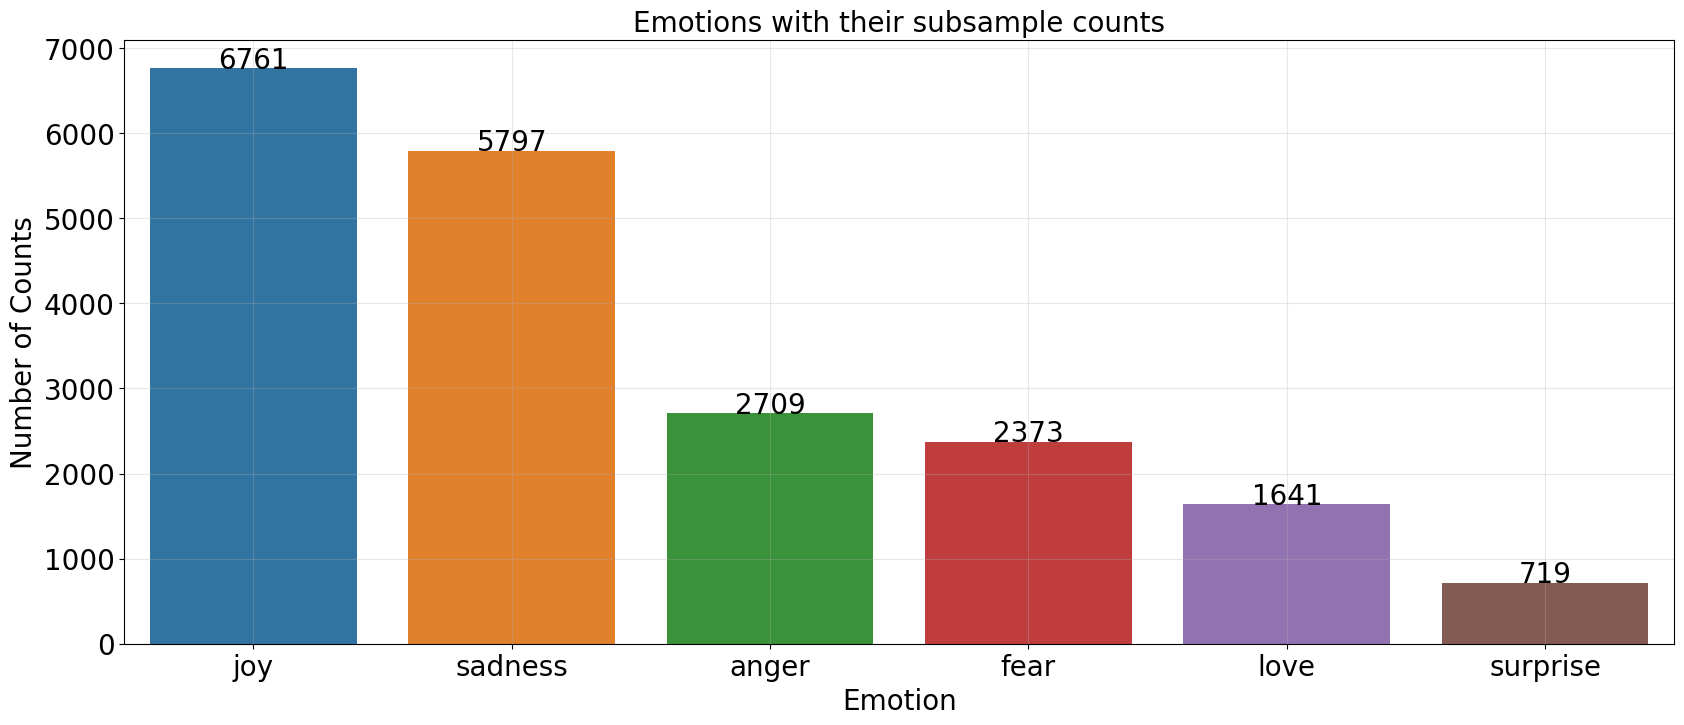

In [7]:
dfN_emotion = Data.Emotions.value_counts()
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',size=20)
        
Code = ['joy','sadness','anger','fear','love','surprise']
plt.figure(figsize=(20,8),dpi=100)
sns.barplot(Code,dfN_emotion)
addlabels(Code,dfN_emotion)
plt.xlabel("Emotion",fontsize=20)
plt.ylabel("Number of Counts",fontsize=20)
plt.title(f"Emotions with their subsample counts",fontsize=20)
plt.tick_params(axis='both',labelsize=20)
plt.grid(alpha=0.3)

df          = pd.DataFrame(dfN_emotion)

In [8]:
Data['Text_Length'] = Data['Text'].apply(lambda x: len(x.split(' ')))
Data.head()

Text Emotions  Text_Length
0                            i didnt feel humiliated  sadness            4
1  i can go from feeling so hopeless to so damned...  sadness           21
2   im grabbing a minute to post i feel greedy wrong    anger           10
3  i am ever feeling nostalgic about the fireplac...     love           18
4                               i am feeling grouchy    anger            4

In [9]:
Data.describe()

Text_Length
count  20000.000000
mean      19.135050
std       10.972016
min        2.000000
25%       11.000000
50%       17.000000
75%       25.000000
max       66.000000

+ Maximum number of words in a text is 66
+ Minimum number of words in a text is 2

# Counting Number of words in a Text

## Histogram plot

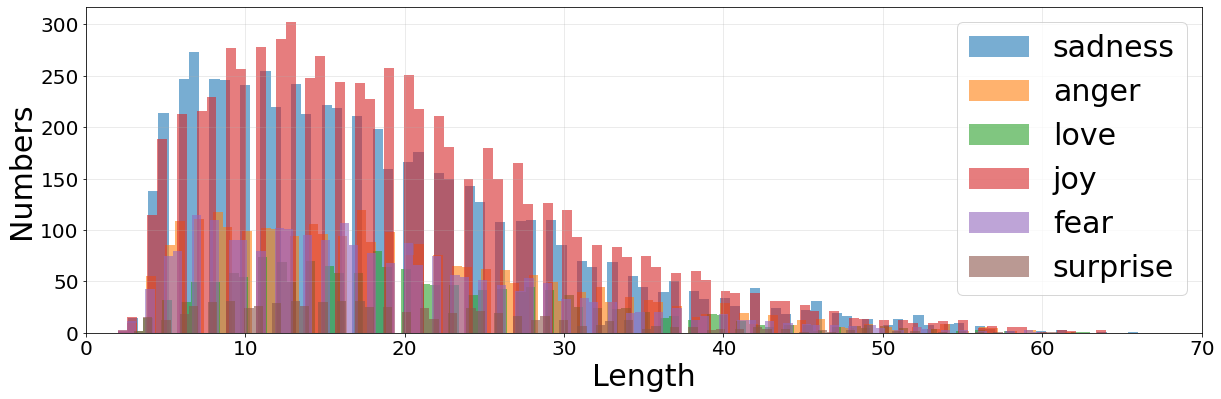

In [10]:
plt.rcParams['figure.figsize'] = (20.0, 6.0)
plt.hist(Data[Data['Emotions'] == 'sadness']['Text_Length'],  alpha = 0.6, bins=100, label='sadness')
plt.hist(Data[Data['Emotions'] == 'anger']['Text_Length'],    alpha = 0.6, bins=100, label='anger')
plt.hist(Data[Data['Emotions'] == 'love']['Text_Length'],     alpha = 0.6, bins=100, label='love')
plt.hist(Data[Data['Emotions'] == 'joy']['Text_Length'],      alpha = 0.6, bins=100, label='joy')
plt.hist(Data[Data['Emotions'] == 'fear']['Text_Length'],     alpha = 0.6, bins=100, label='fear')
plt.hist(Data[Data['Emotions'] == 'surprise']['Text_Length'], alpha = 0.6, bins=100, label='surprise')
plt.xlabel('Length',fontsize=30)
plt.ylabel('Numbers',fontsize=30)
plt.legend(loc='upper right',fontsize=30)
plt.xlim(0,70)
plt.tick_params(axis='both',labelsize=20)
plt.grid(alpha=0.3)

## Violin and Boxplot

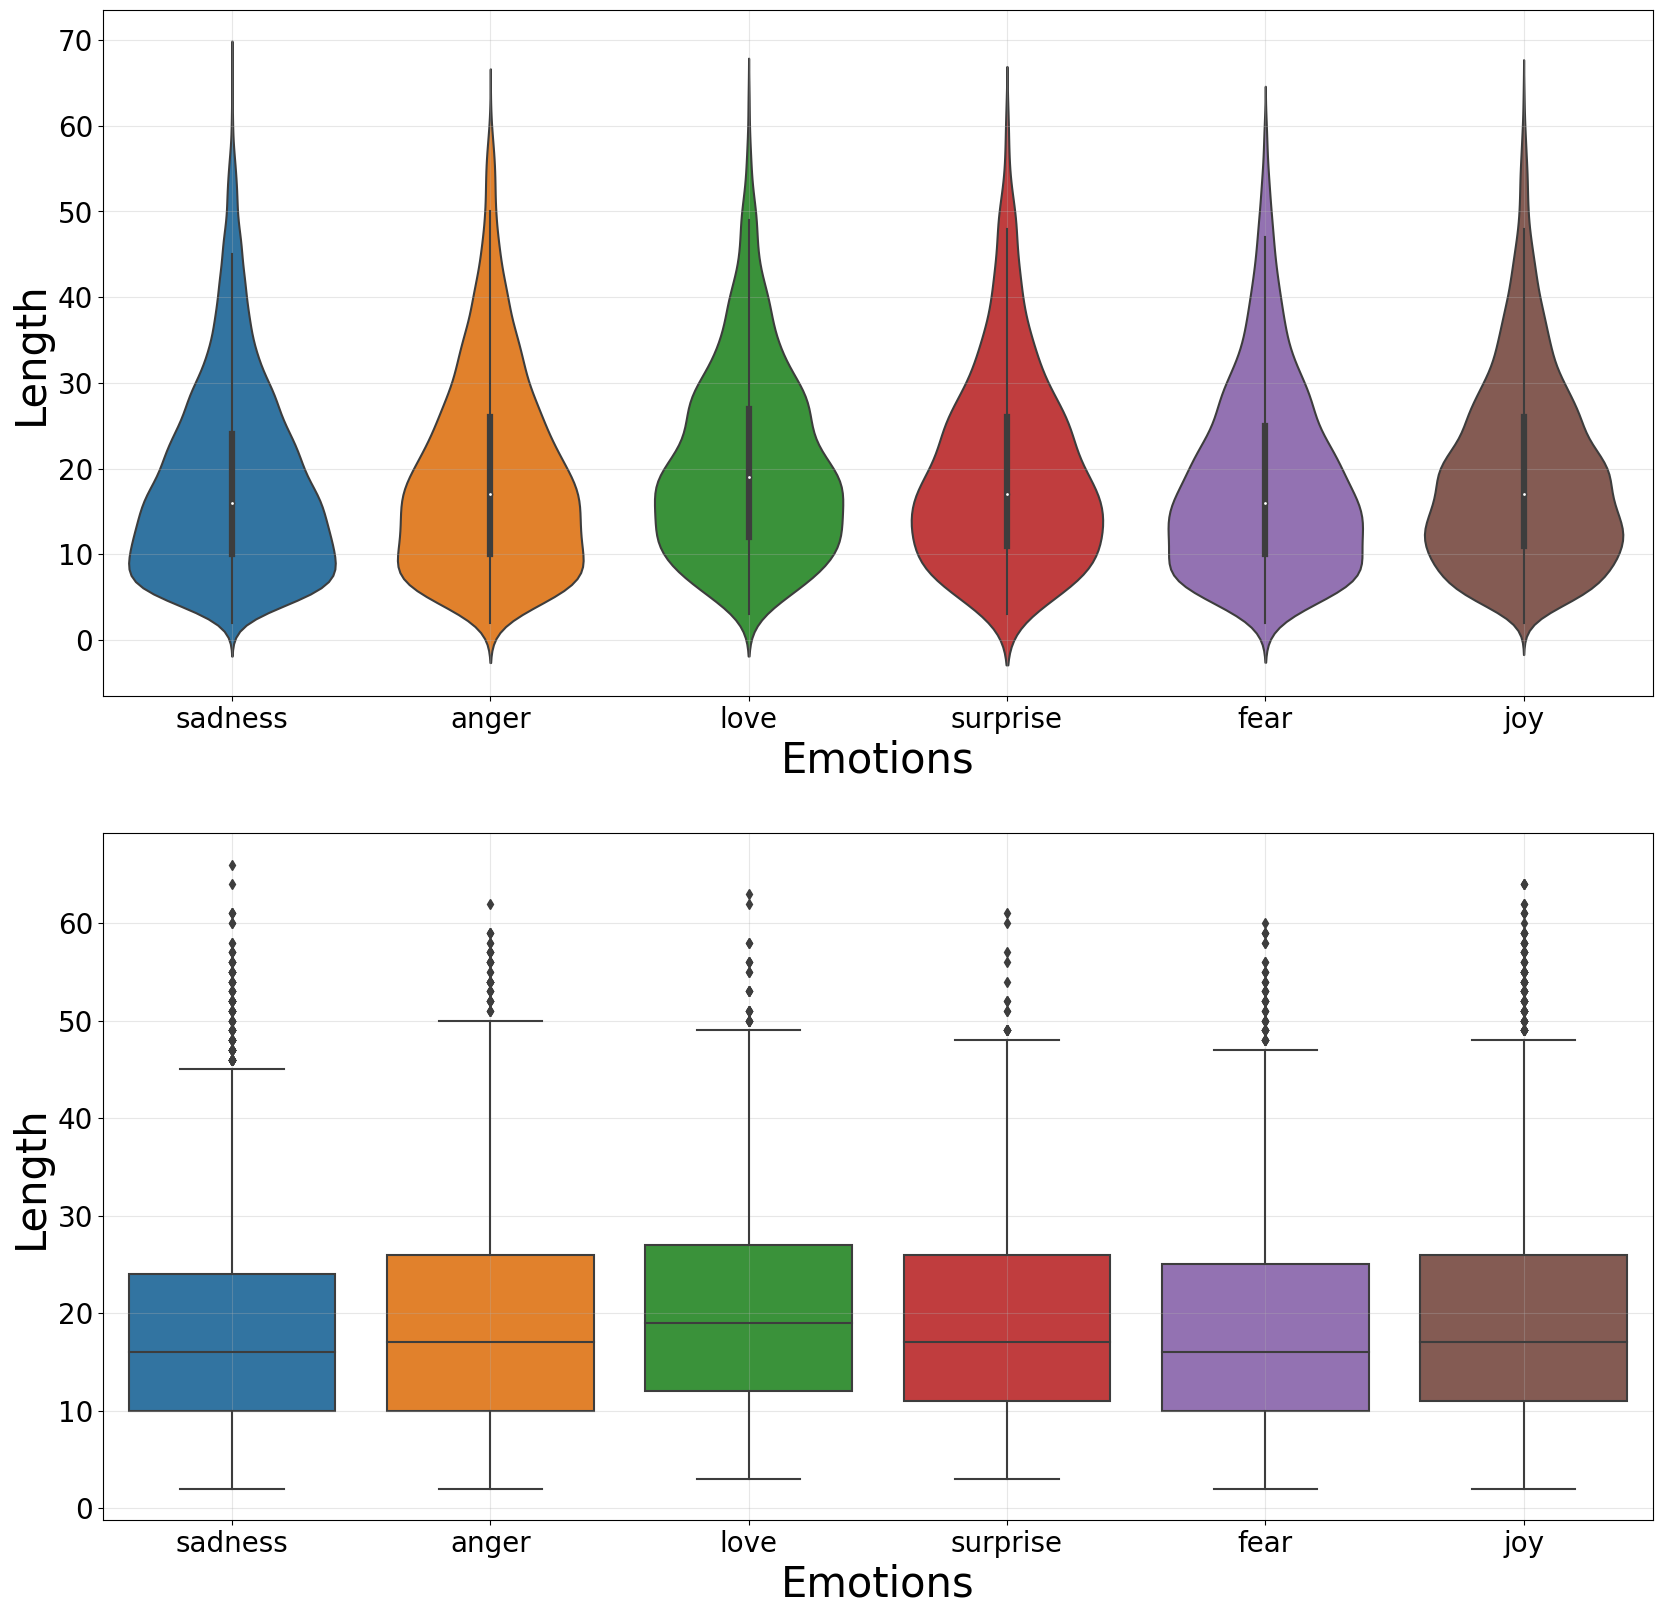

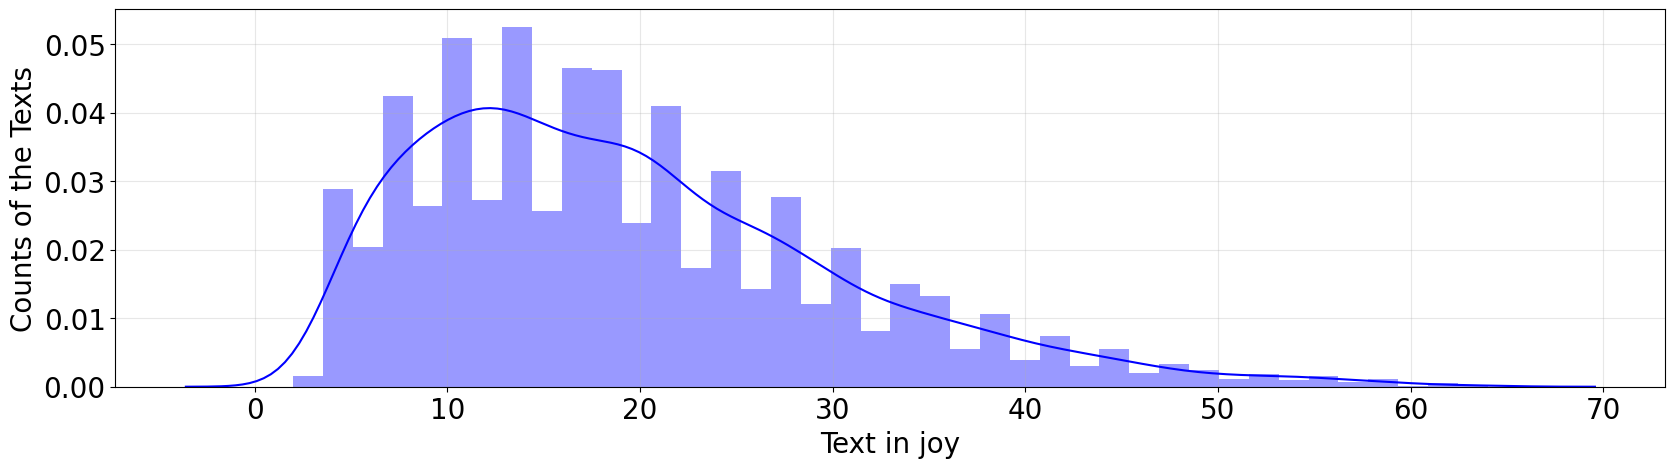

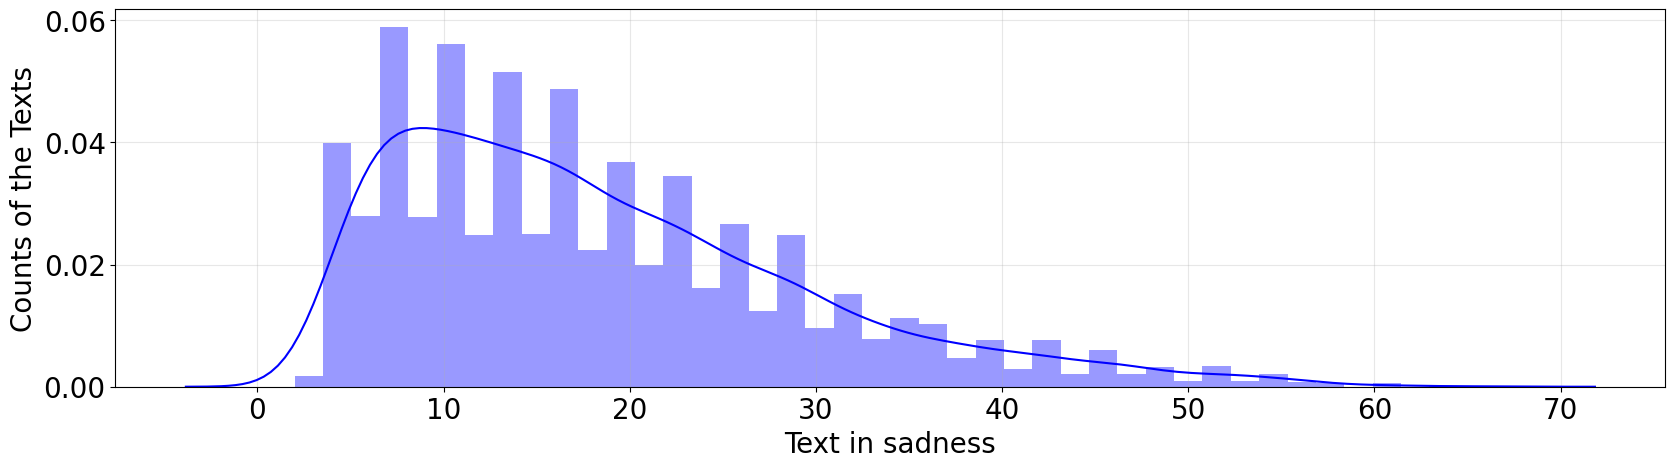

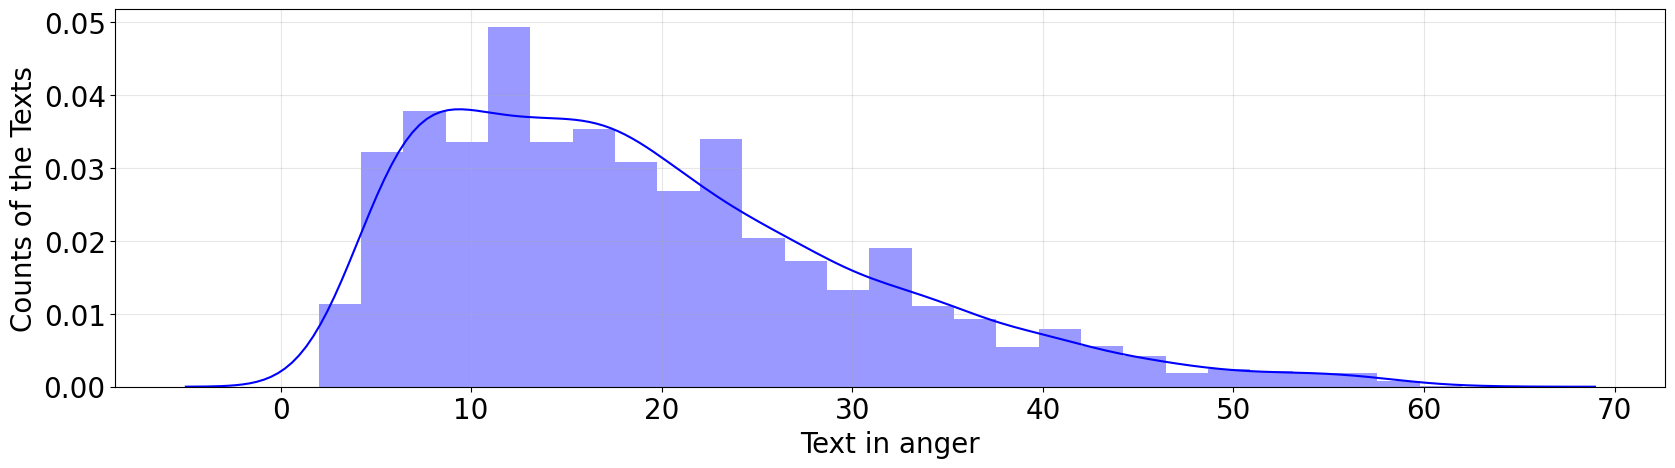

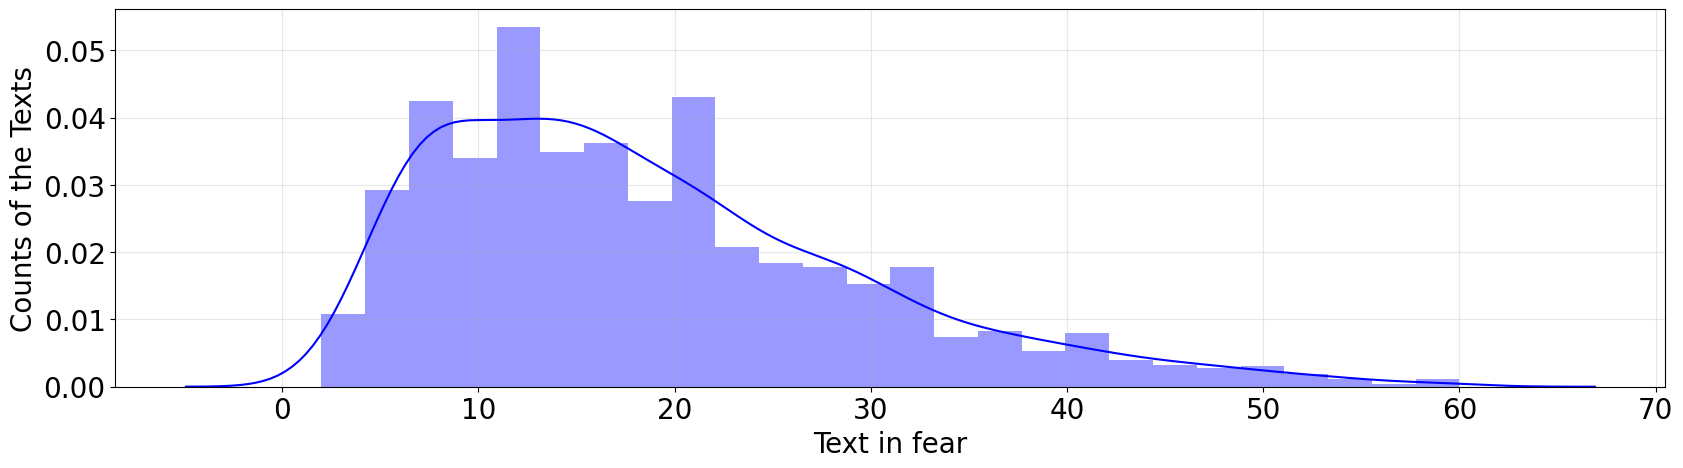

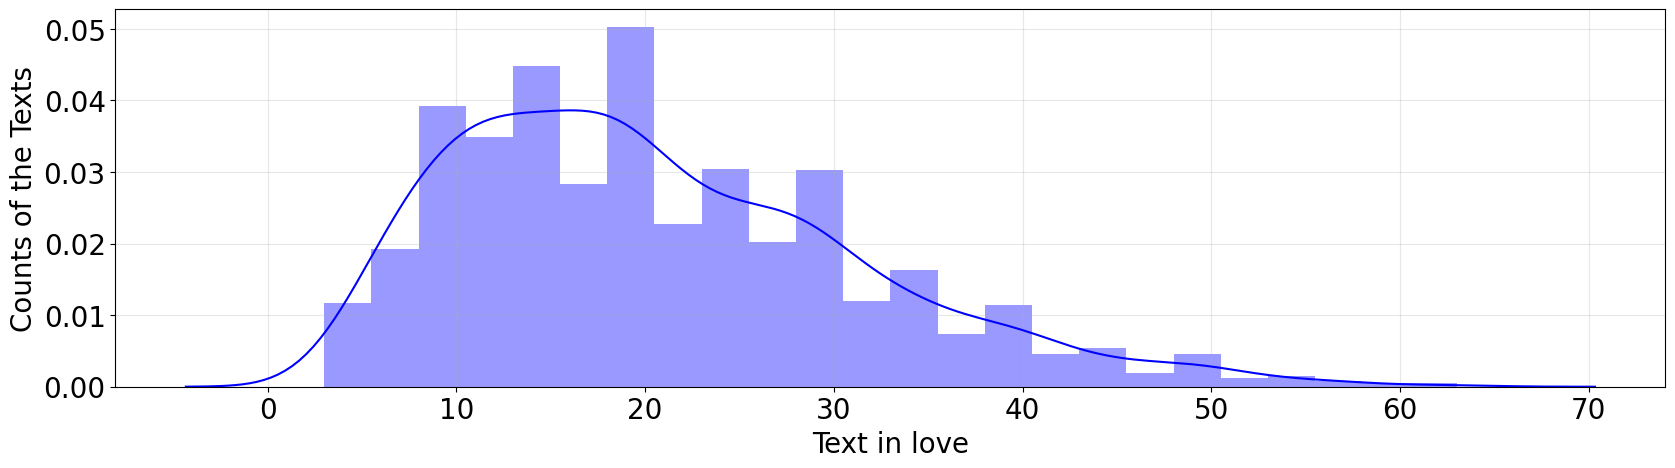

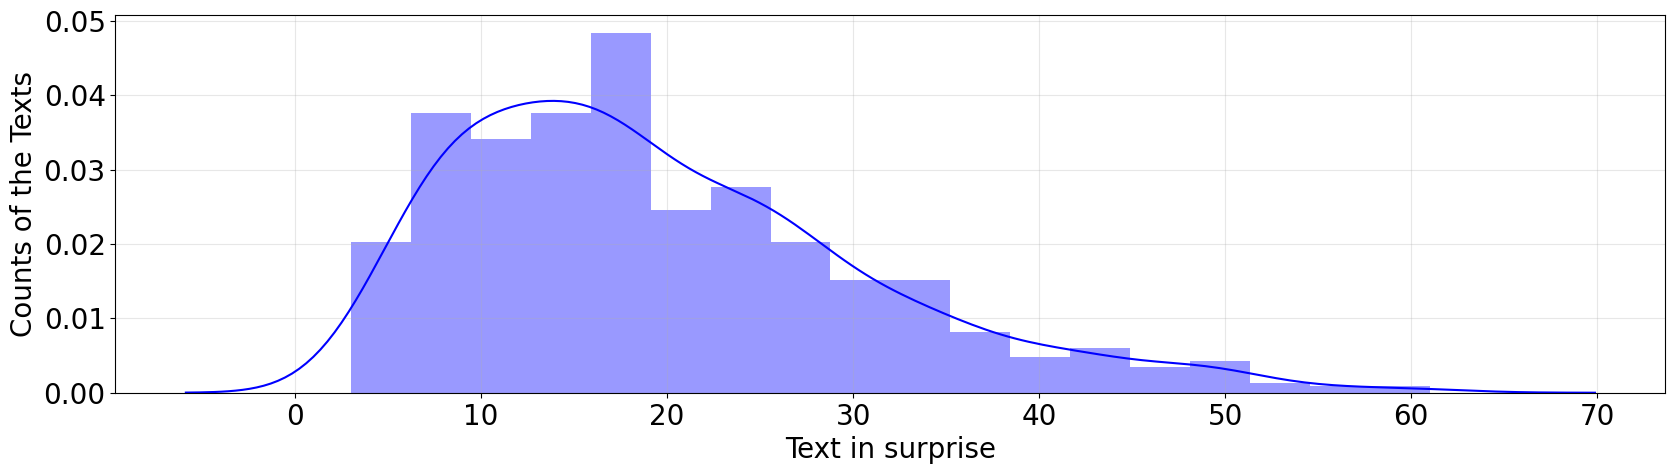

In [11]:
plt.figure(figsize=(20,20),dpi=100)
plt.subplot(2,1,1)
sns.violinplot(Data['Emotions'],Data['Text_Length'])
plt.xlabel('Emotions',fontsize=30)
plt.ylabel('Length',fontsize=30)
plt.tick_params(axis='both',labelsize=20)
plt.grid(alpha=0.3)

plt.subplot(2,1,2)
sns.boxplot(Data['Emotions'],Data['Text_Length'])
plt.xlabel('Emotions',fontsize=30)
plt.ylabel('Length',fontsize=30)
plt.tick_params(axis='both',labelsize=20)
plt.grid(alpha=0.3)

EM = ['joy','sadness','anger','fear','love','surprise']
for i in range(len(EM)):
    emotions = EM[i]
    plt.figure(figsize=(20,5),dpi=100)
    Text_Length = Data[Data['Emotions']==f'{emotions}']['Text'].str.split().map(lambda x: len(x))
    sns.distplot(Text_Length,color='blue')
    plt.xlabel(f'Text in {emotions}',fontsize=20)
    plt.ylabel(f'Counts of the Texts',fontsize=20)
    plt.tick_params(axis='both',labelsize=20)
    plt.grid(alpha=0.3)

## Average number of words in a single text

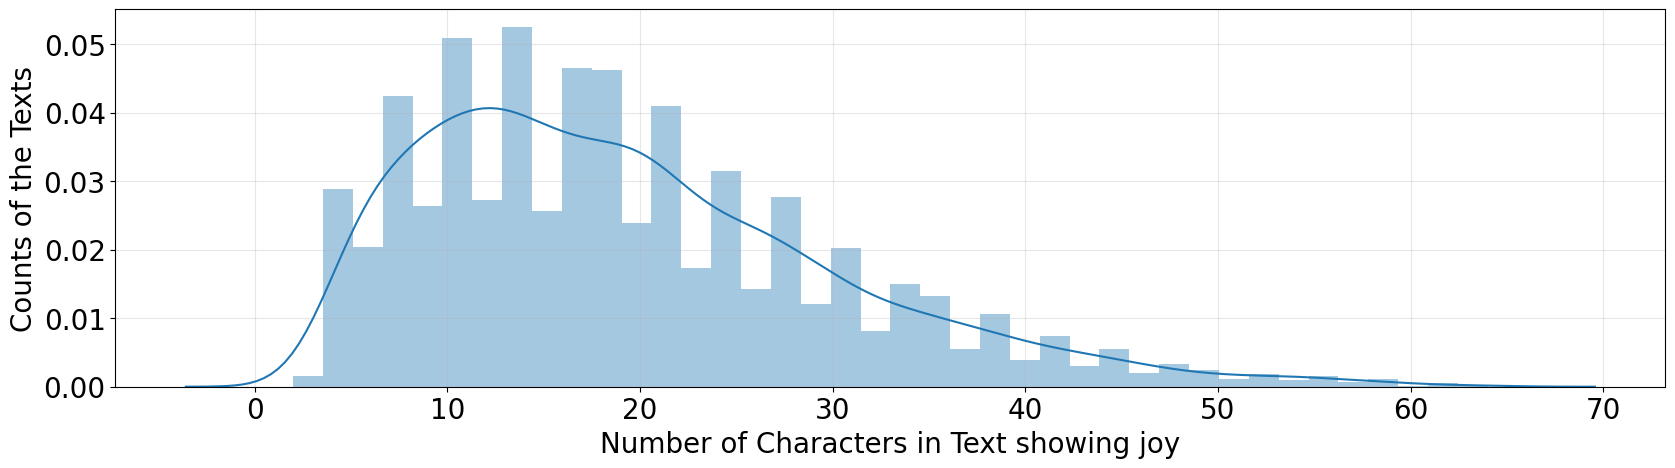

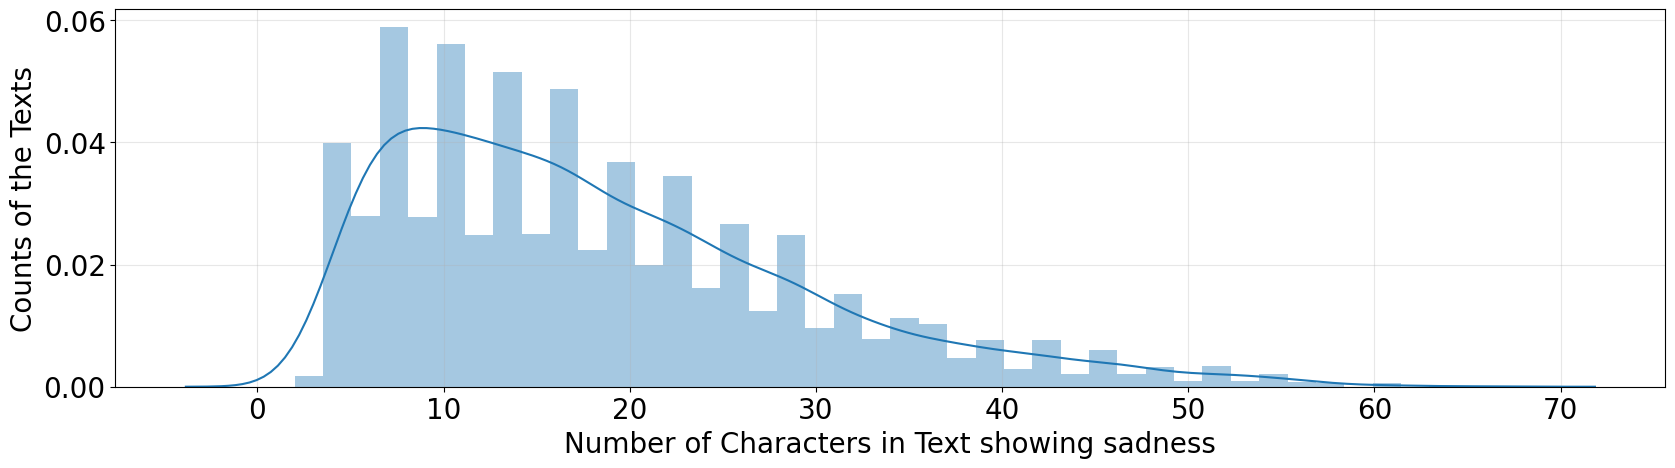

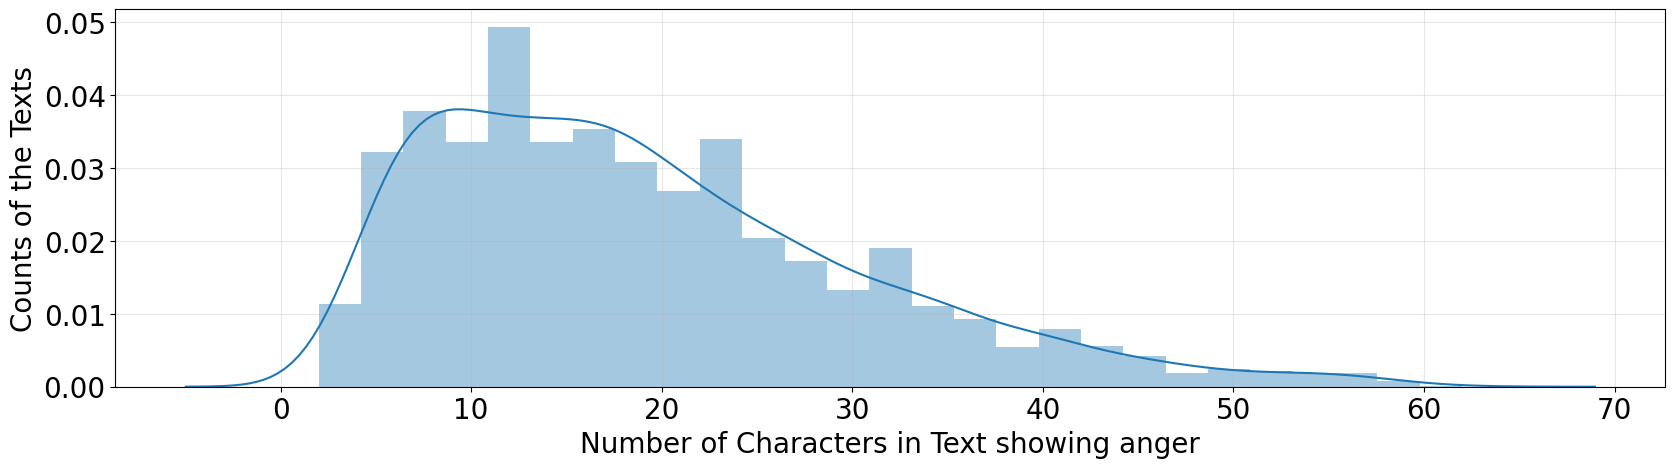

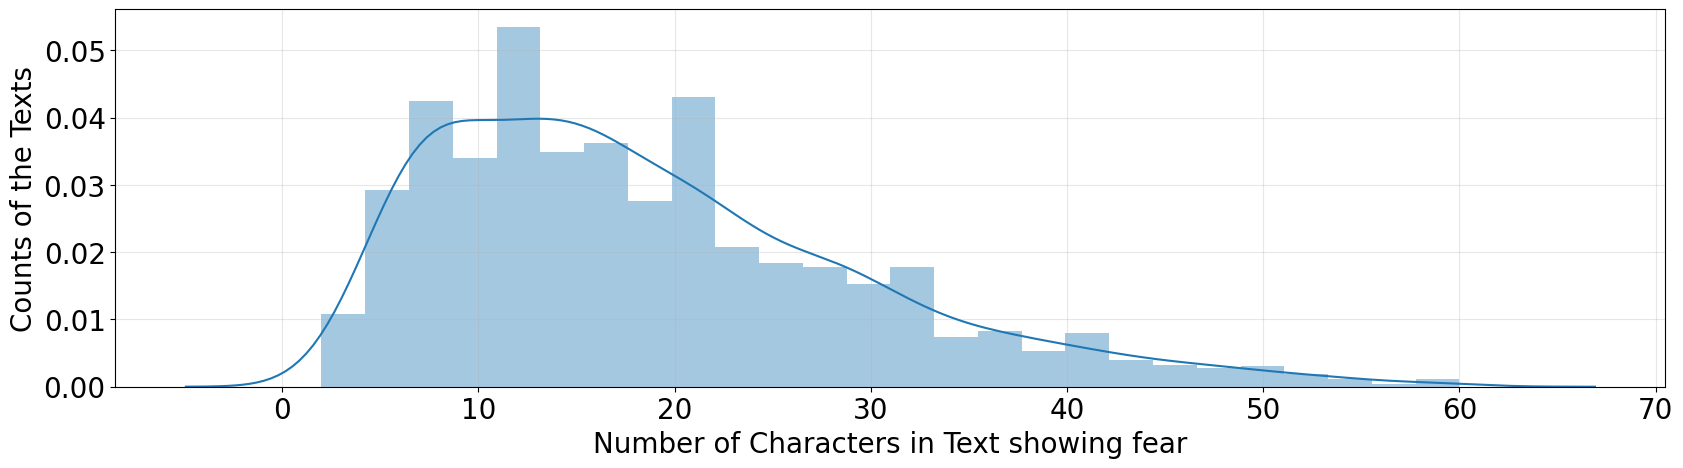

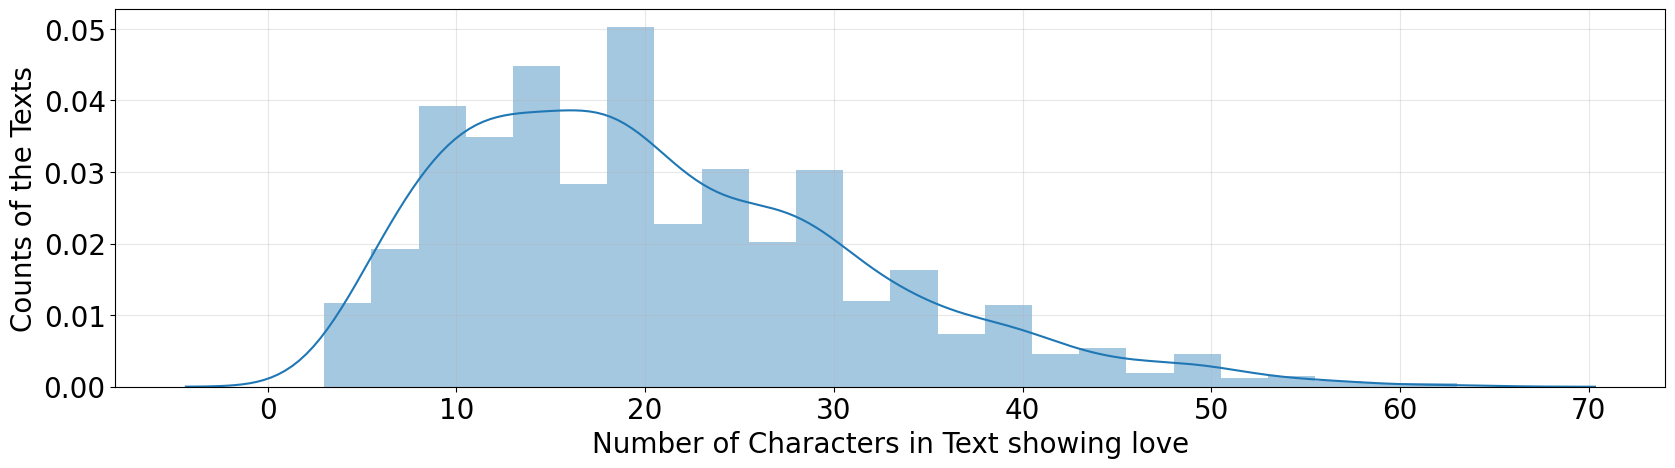

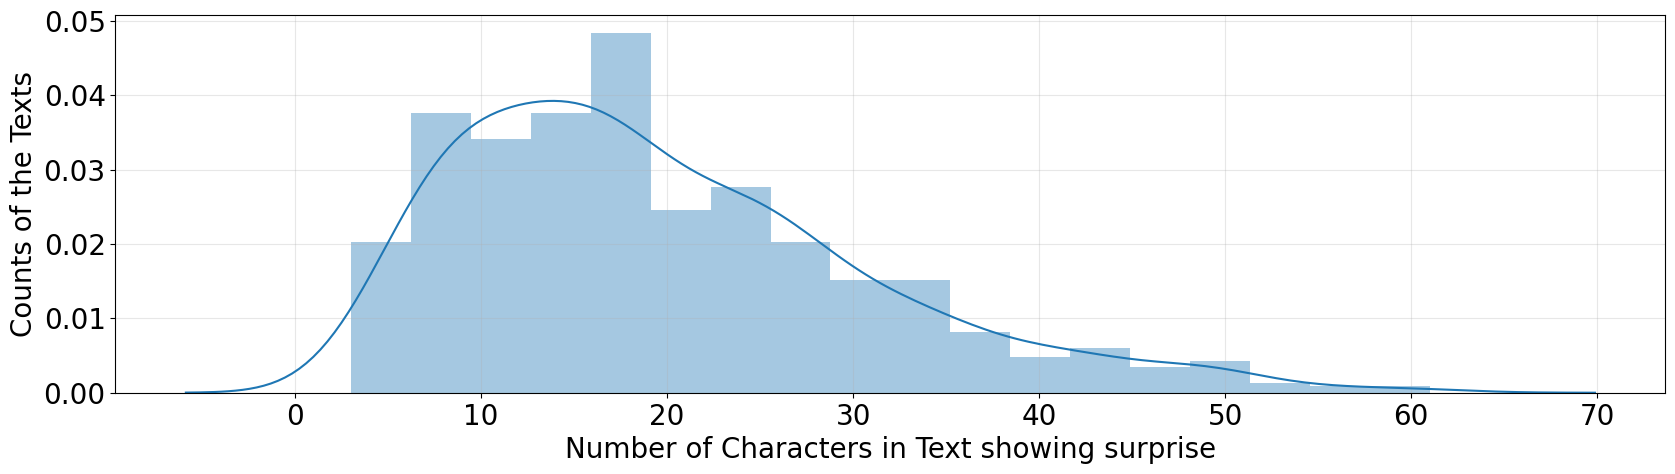

In [12]:
for i in range(len(EM)):
    emotions = EM[i]
    plt.figure(figsize=(20,5),dpi=100)
    Text_Length = Data[Data['Emotions']==f'{emotions}']['Text'].str.split().map(lambda x: len(x))
    sns.distplot(Text_Length)
    plt.xlabel(f'Number of Characters in Text showing {emotions}',fontsize=20)
    plt.ylabel(f'Counts of the Texts',fontsize=20)
    plt.tick_params(axis='both',labelsize=20)
    plt.grid(alpha=0.3)

## Counting Number of Characters in a Text

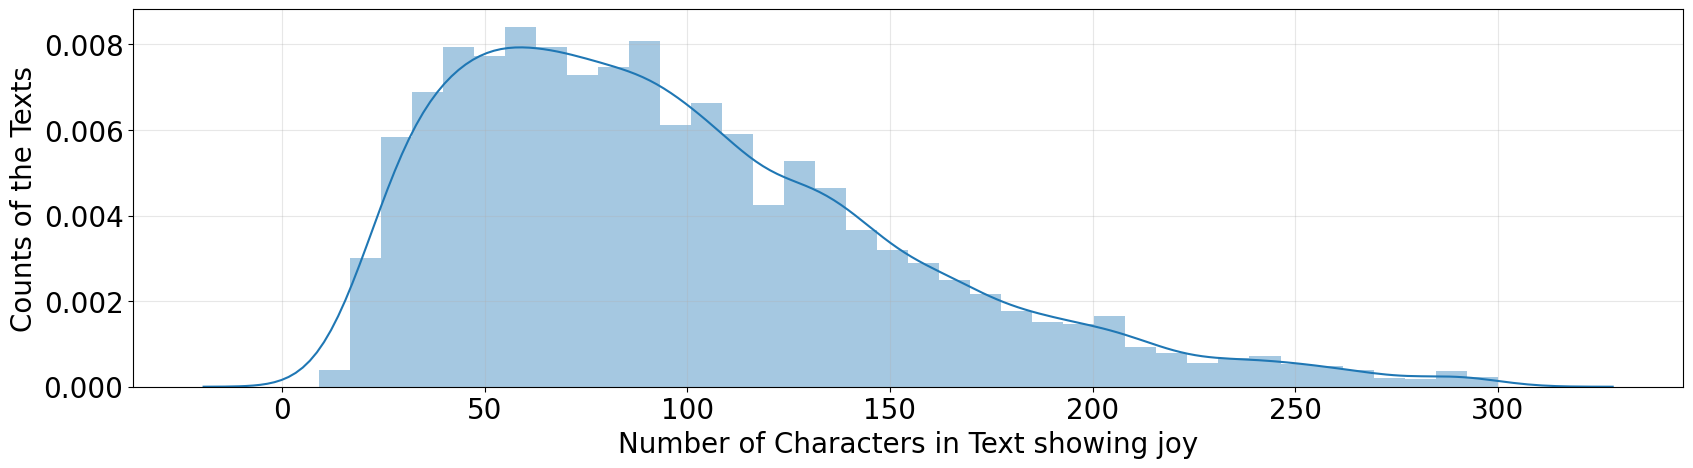

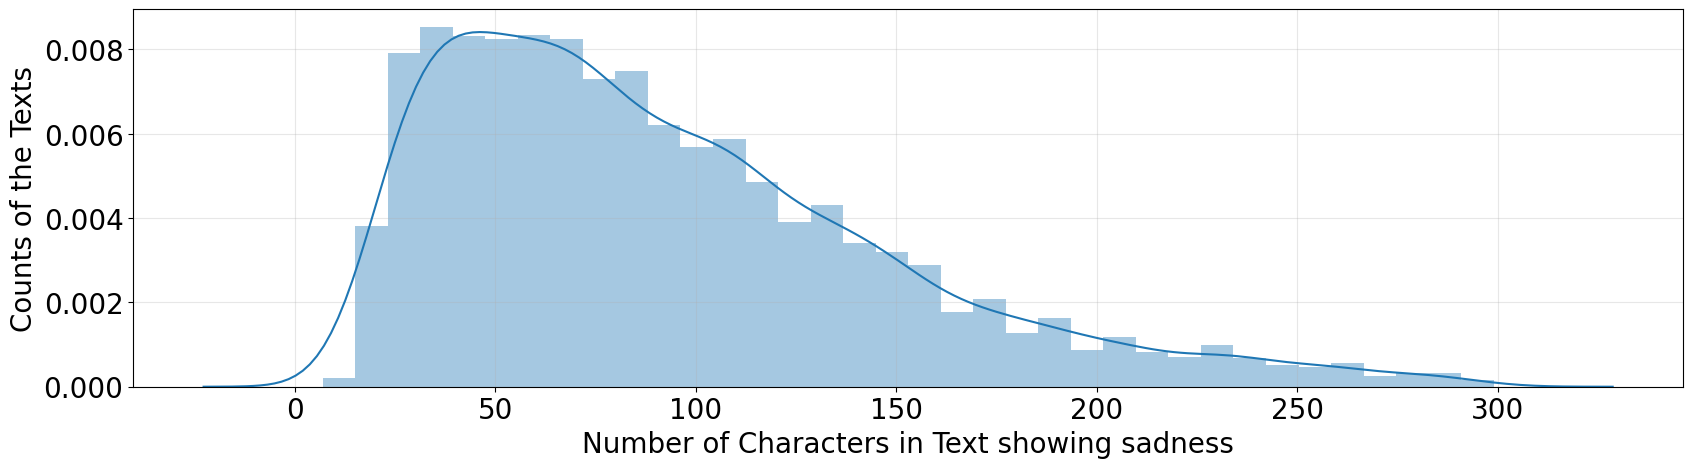

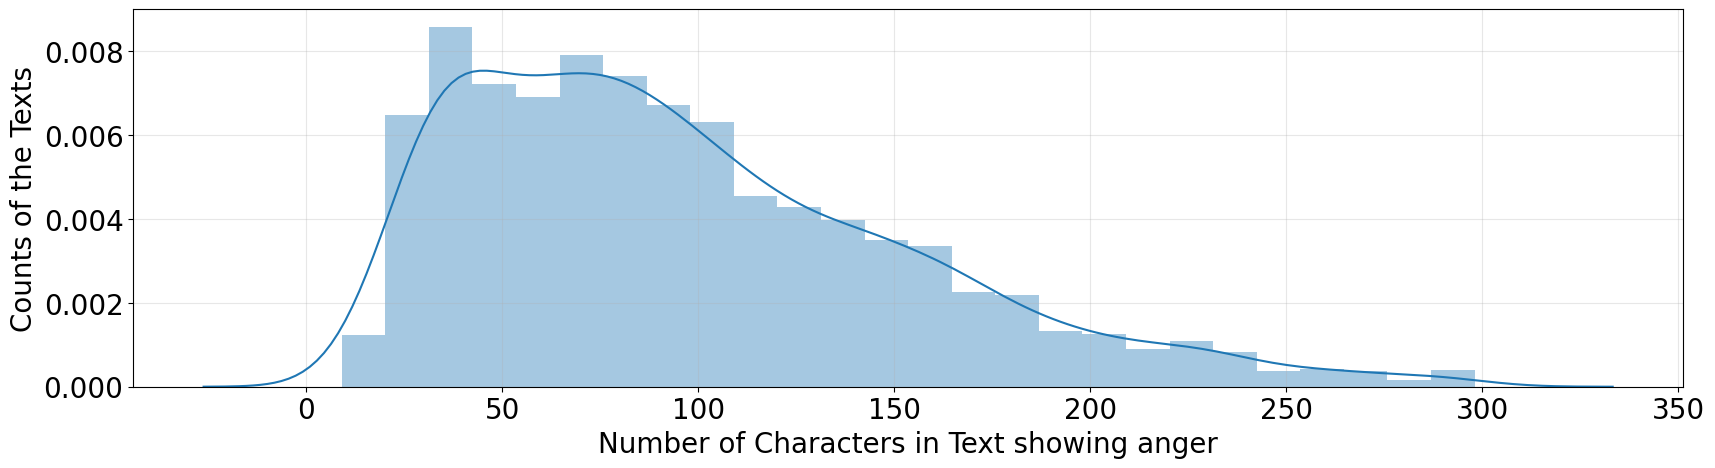

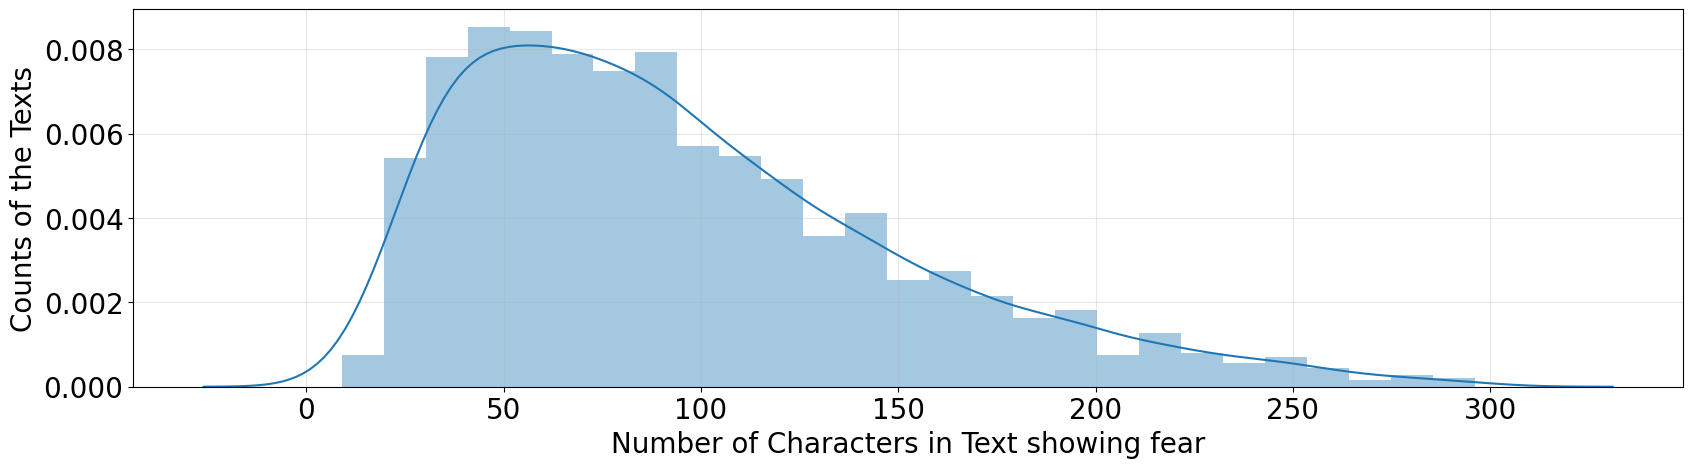

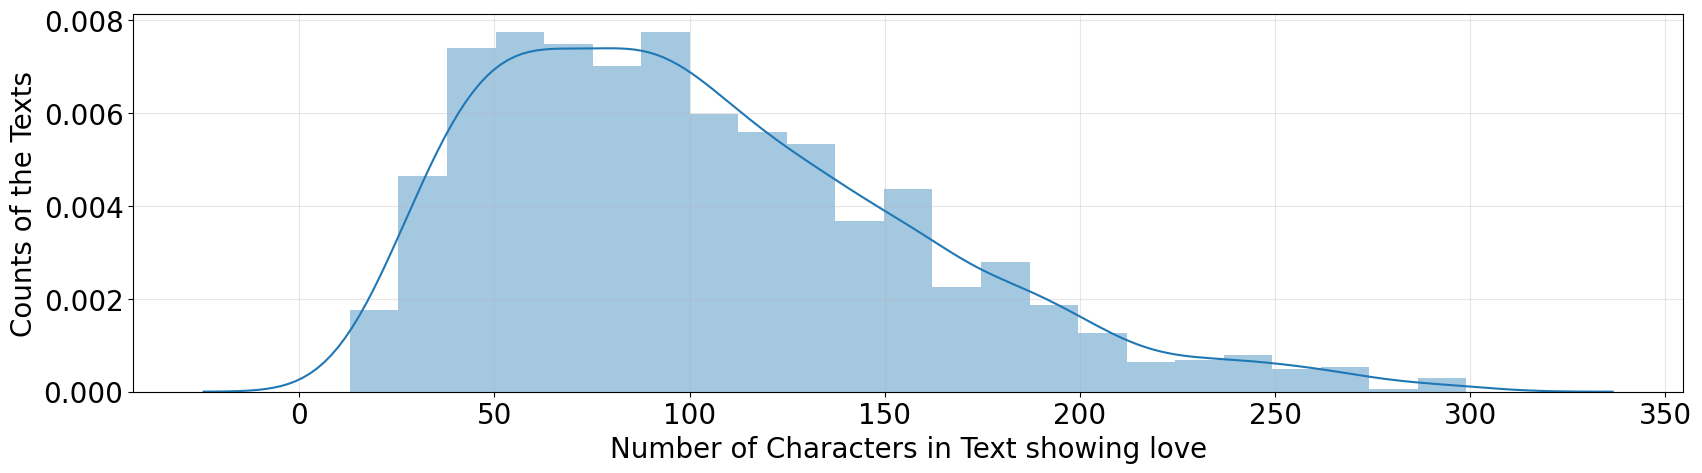

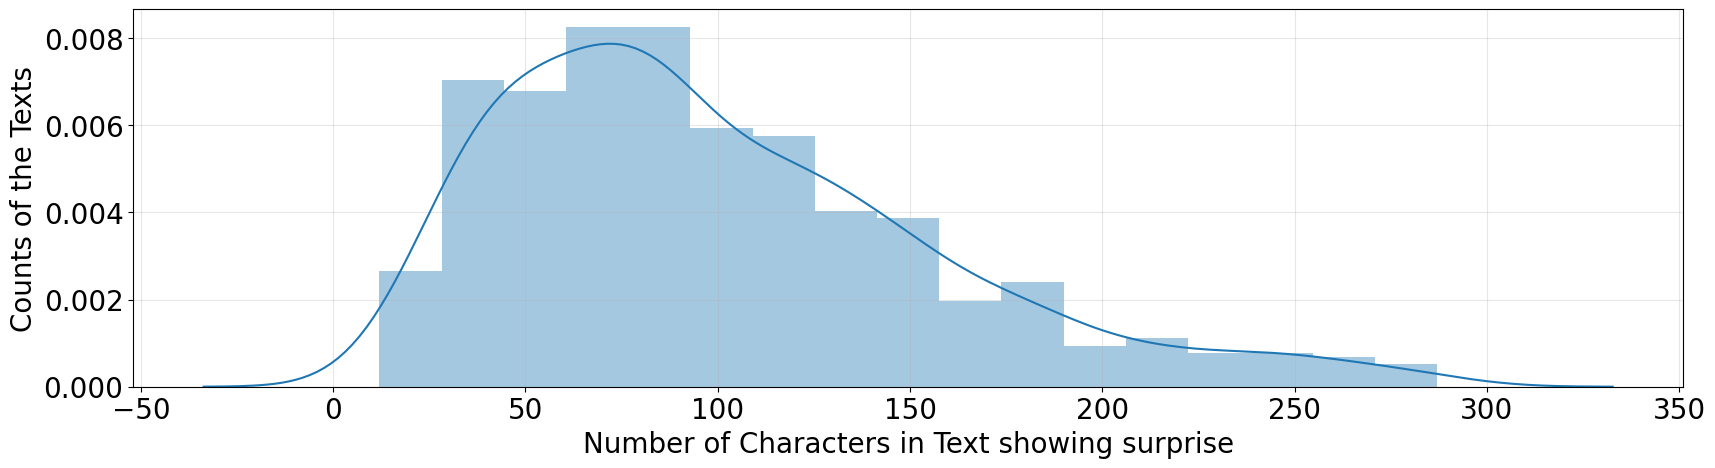

In [13]:
EM = ['joy','sadness','anger','fear','love','surprise']
for i in range(len(EM)):
    emotions = EM[i]
    plt.figure(figsize=(20,5),dpi=100)
    Text_Length = Data[Data['Emotions']==f'{emotions}']['Text'].str.len()
    sns.distplot(Text_Length)
    plt.xlabel(f'Number of Characters in Text showing {emotions}',fontsize=20)
    plt.ylabel(f'Counts of the Texts',fontsize=20)
    plt.tick_params(axis='both',labelsize=20)
    plt.grid(alpha=0.3)

##  Average number of characters in a single text

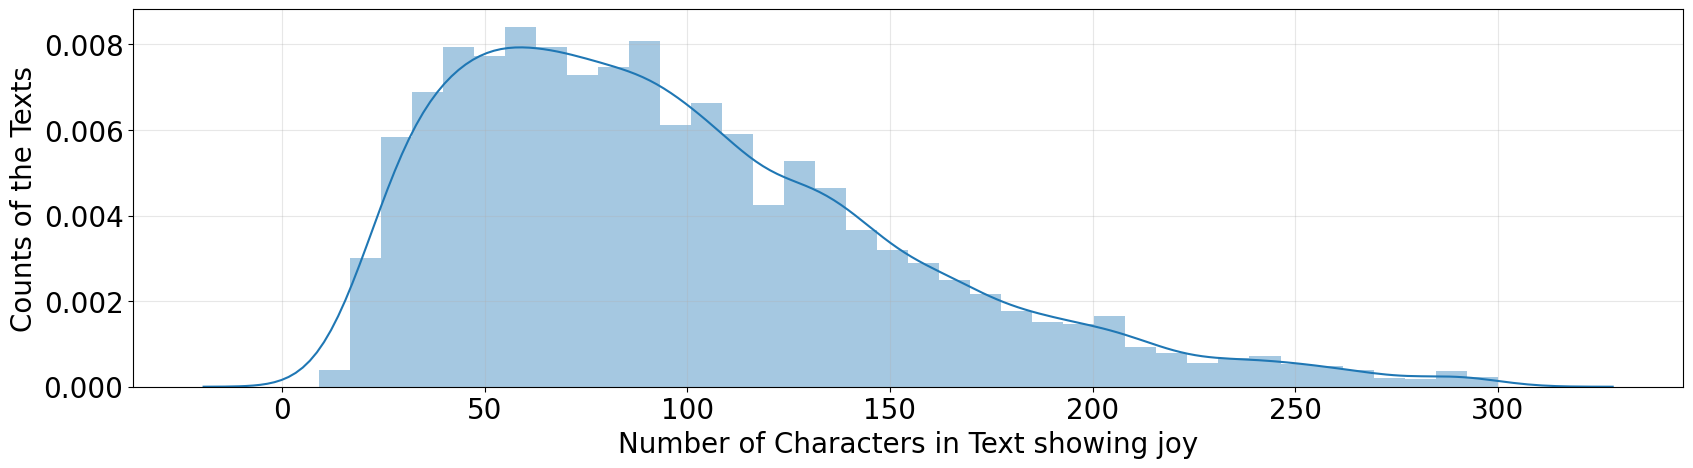

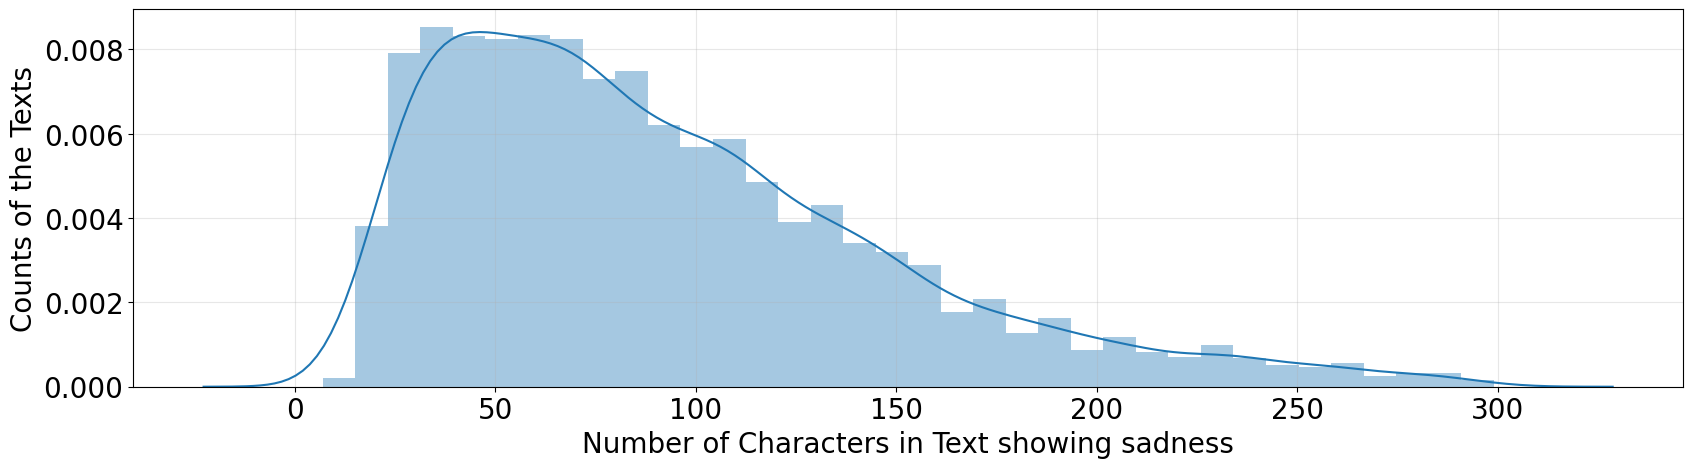

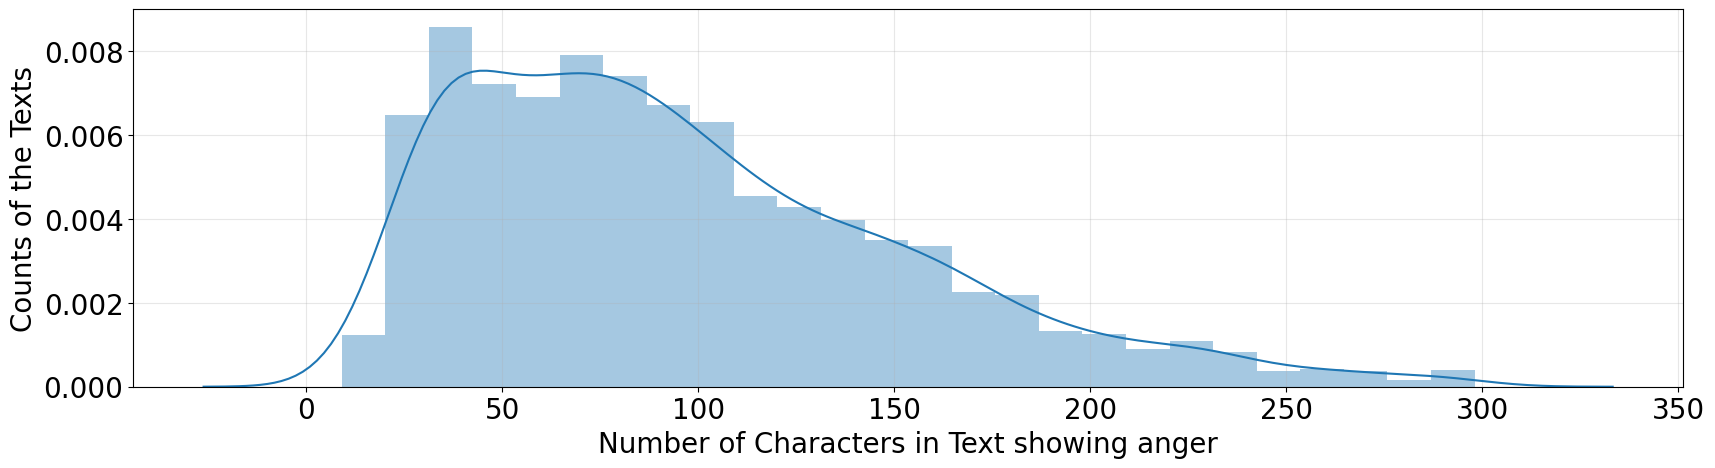

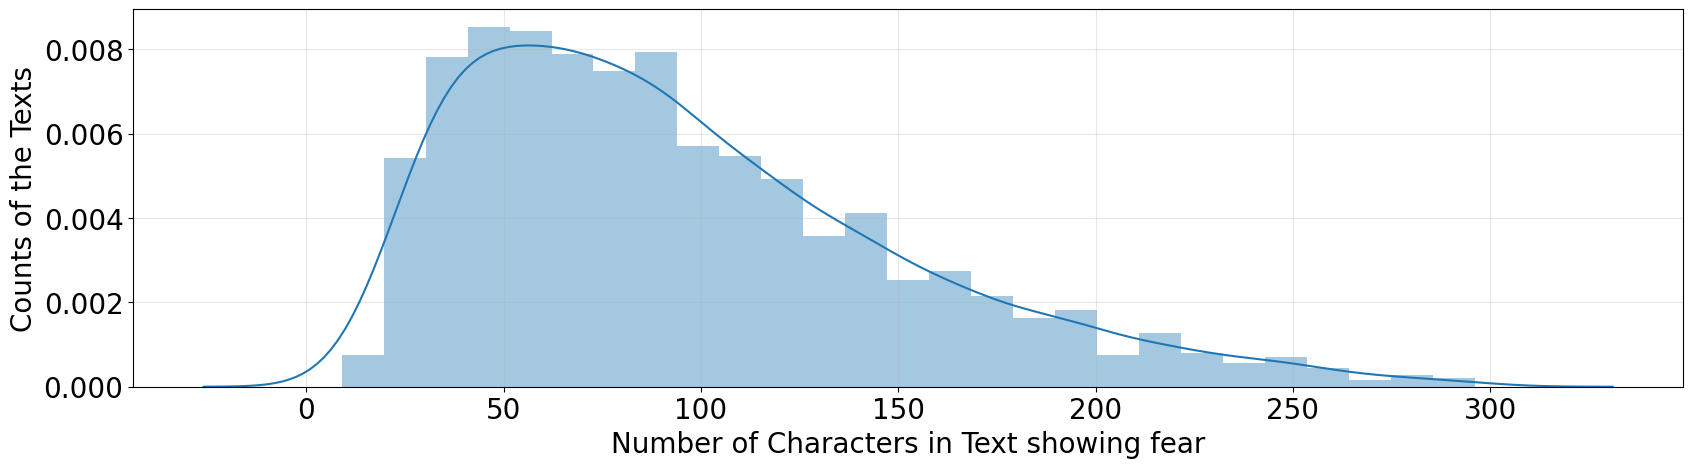

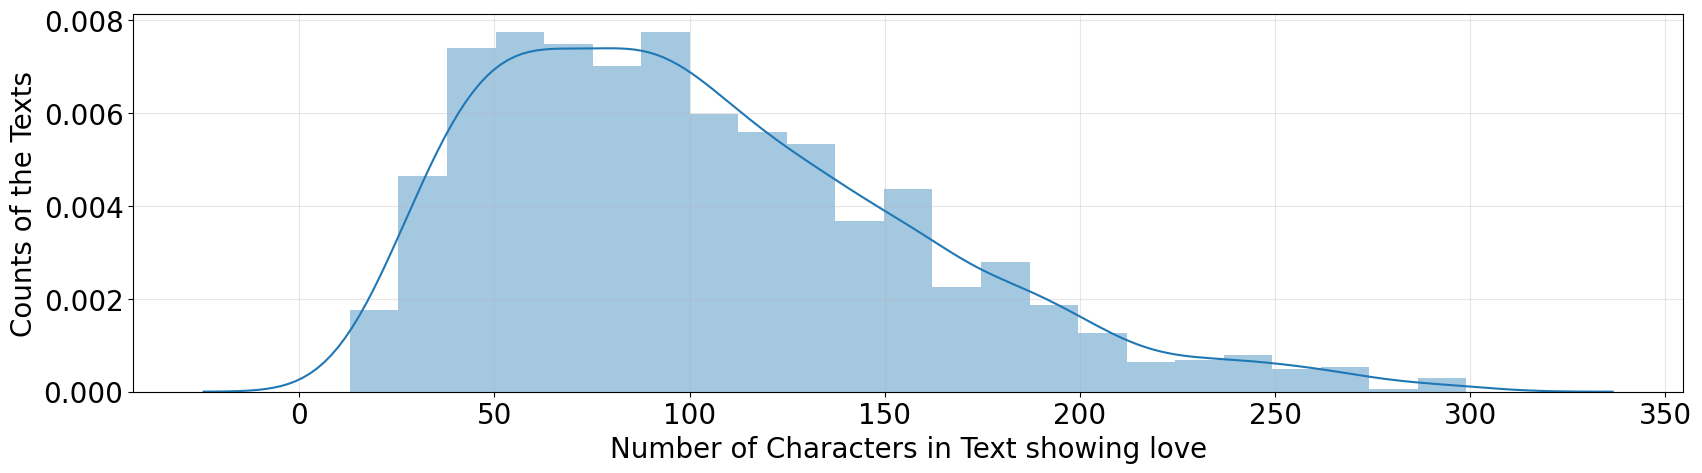

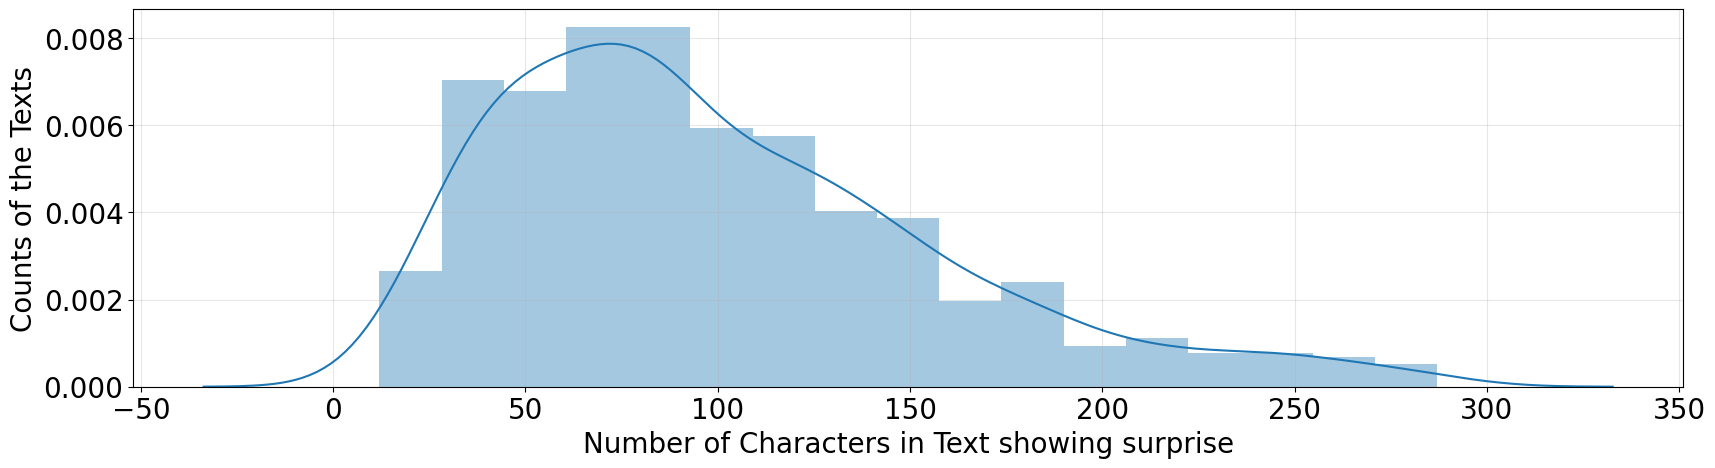

In [14]:
for i in range(len(EM)):
    emotions = EM[i]
    plt.figure(figsize=(20,5),dpi=100)
    Text_Length = Data[Data['Emotions']==f'{emotions}']['Text'].str.len()
    sns.distplot(Text_Length)
    plt.xlabel(f'Number of Characters in Text showing {emotions}',fontsize=20)
    plt.ylabel(f'Counts of the Texts',fontsize=20)
    plt.tick_params(axis='both',labelsize=20)
    plt.grid(alpha=0.3)

## Common top 15 stopwords in a text

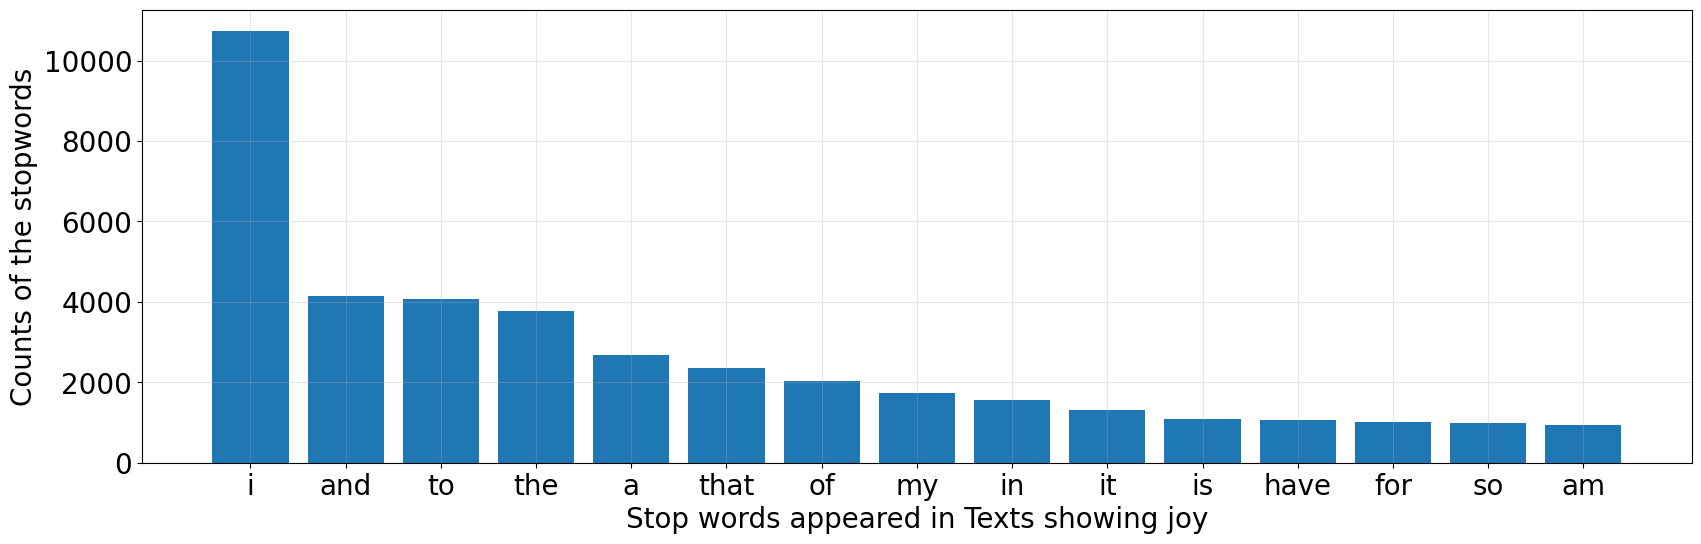

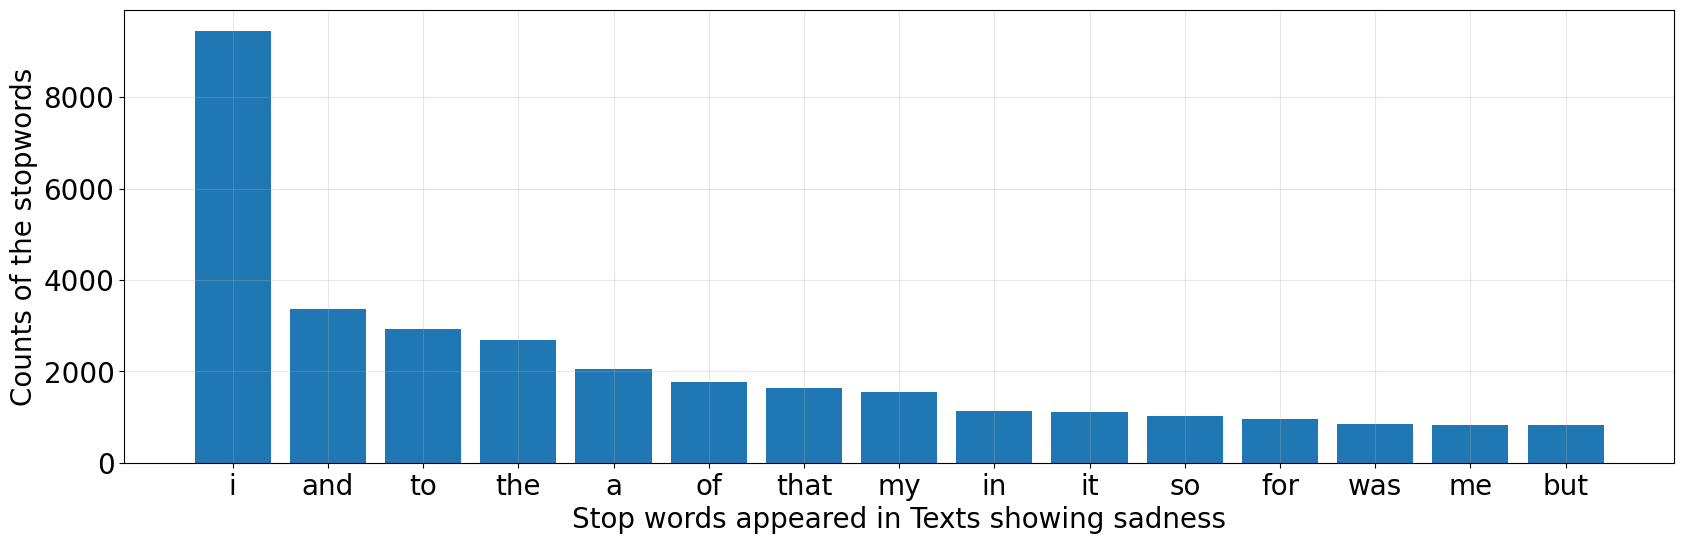

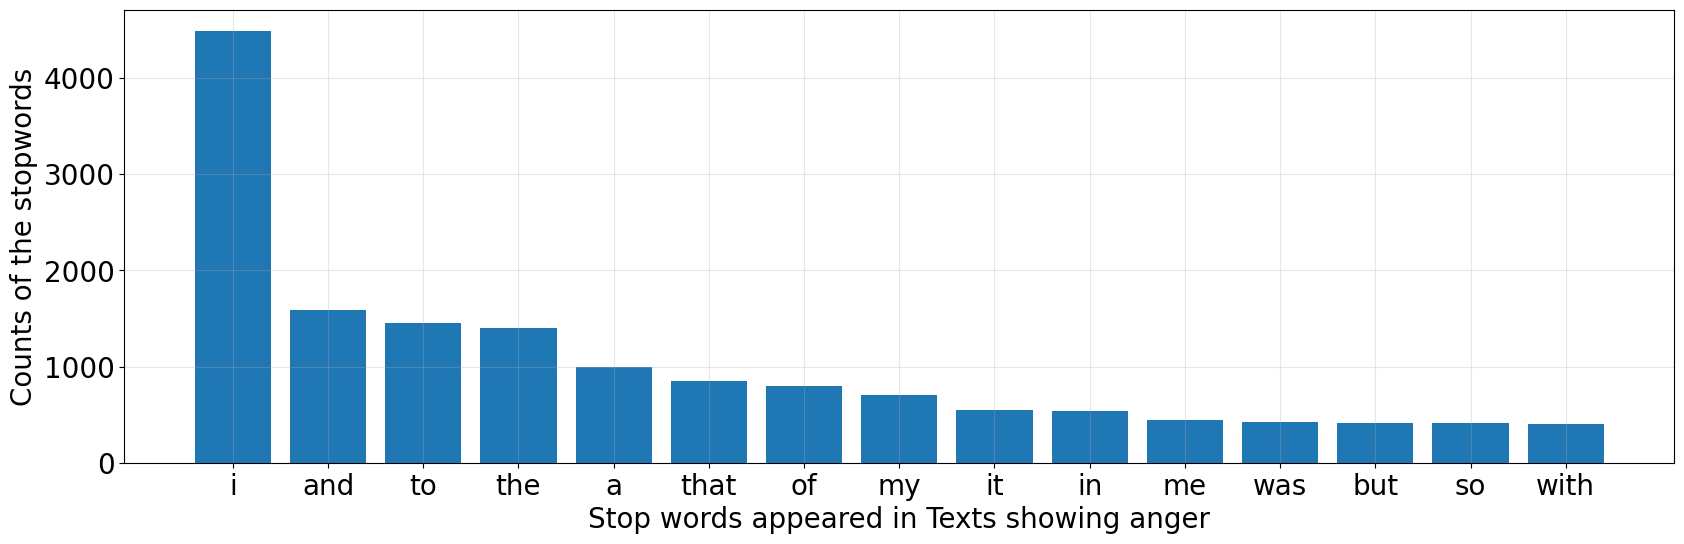

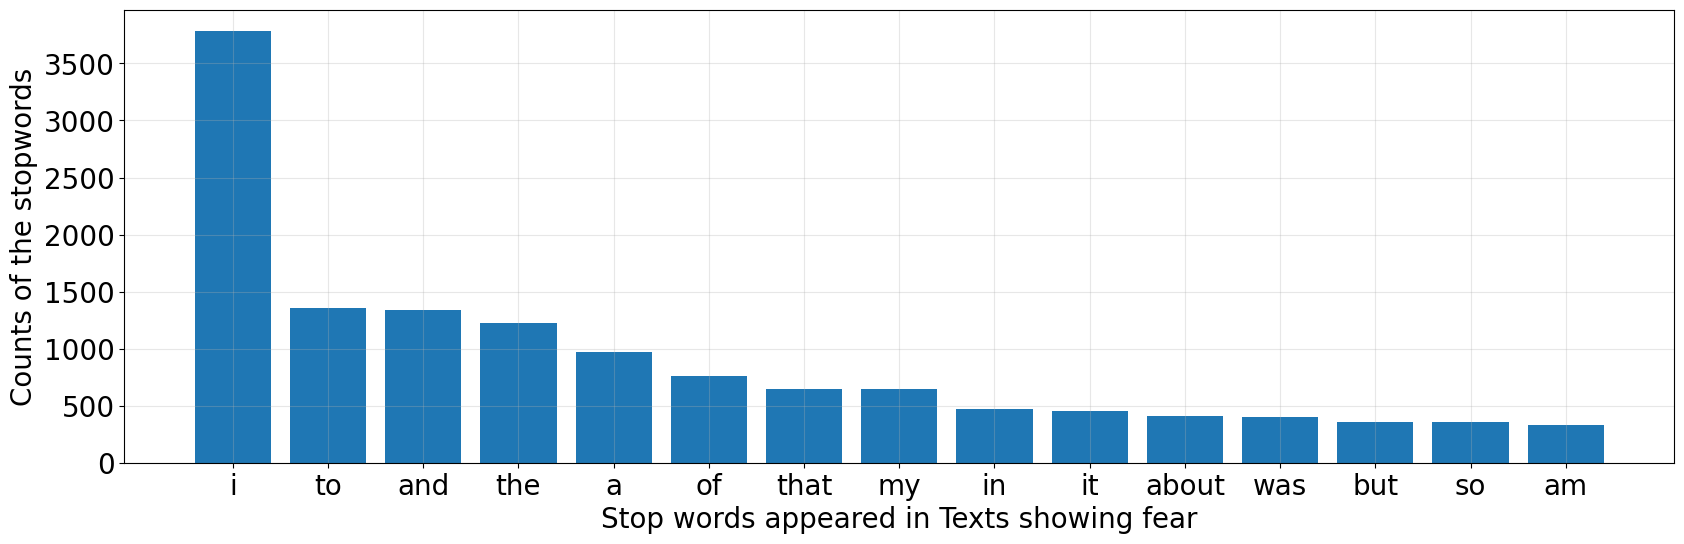

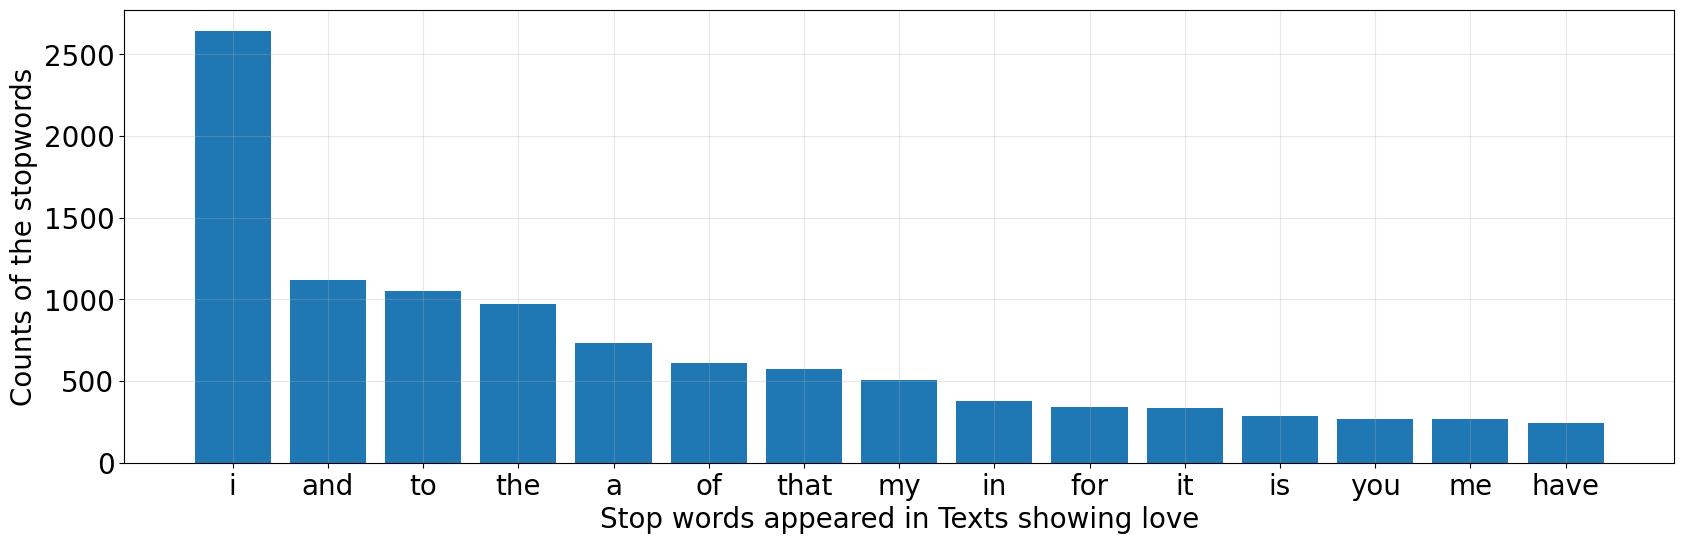

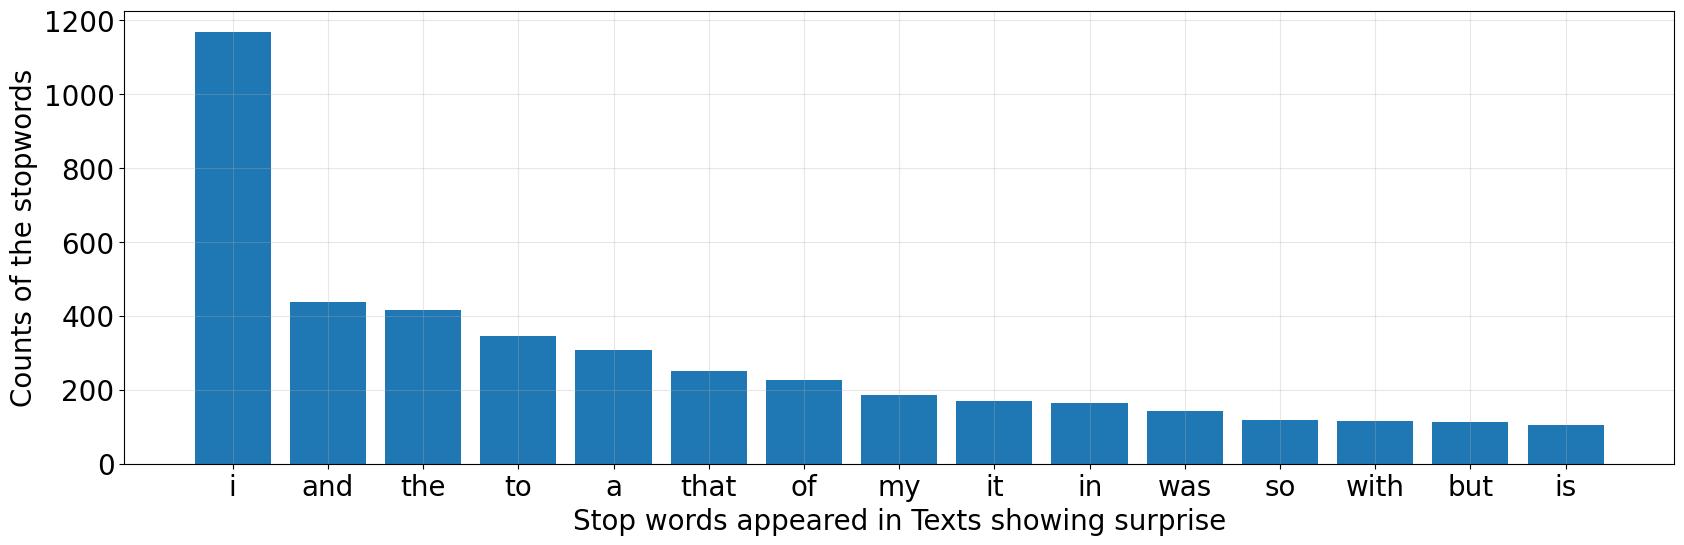

In [15]:
def create_corpus(emotion):
    corpus=[]
    for x in Data[Data['Emotions']==emotion]['Text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

for i in range(len(EM)):
    emotions = EM[i]
    stop_words = stopwords.words('english')

    corpus = create_corpus(f'{emotions}')
    dic    = defaultdict(int)
    for word in corpus:
        if word in stop_words:
            dic[word]+=1
    stop_words = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:]
    x,y=zip(*stop_words)
    
    plt.figure(figsize=(20,6),dpi=100)
    plt.bar(x[:15],y[:15])
    plt.xlabel(f'Stop words appeared in Texts showing {emotions}',fontsize=20)
    plt.ylabel(f'Counts of the stopwords',fontsize=20)
    plt.tick_params(axis='both',labelsize=20)
    plt.grid(alpha=0.3)

+ In all the texts containing different emotions we can see that stopwords 'I', 'and', 'the' and 'to' frequently occured

## Analyzing punctuations

In [16]:
for i in range(len(EM)):
    emotions = EM[i]
    stop_words = stopwords.words('english')

    corpus = create_corpus(f'{emotions}')
    dic    = defaultdict(int)
    special = string.punctuation
    for word in corpus:
        if word in special:
            dic[word]+=1
    print(dic)

defaultdict(<class 'int'>, {})
defaultdict(<class 'int'>, {})
defaultdict(<class 'int'>, {})
defaultdict(<class 'int'>, {})
defaultdict(<class 'int'>, {})
defaultdict(<class 'int'>, {})


+ No punctuations are present

##  Counting punctuations

In [17]:
%%time
Text = Data['Text']
for j in range(len(special)):
    Number_of_Counts = 0
    for i in range(len(Data['Text'])):
        Text_i = np.array(Data['Text'])[i]
        New_Count = Text_i.count(special[j])
        Number_of_Counts = Number_of_Counts + New_Count
    print(f'Counts = {Number_of_Counts} for the {special[j]}')

Counts = 0 for the !
Counts = 0 for the "
Counts = 0 for the #
Counts = 0 for the $
Counts = 0 for the %
Counts = 0 for the &
Counts = 0 for the '
Counts = 0 for the (
Counts = 0 for the )
Counts = 0 for the *
Counts = 0 for the +
Counts = 0 for the ,
Counts = 0 for the -
Counts = 0 for the .
Counts = 0 for the /
Counts = 0 for the :
Counts = 0 for the ;
Counts = 0 for the <
Counts = 0 for the =
Counts = 0 for the >
Counts = 0 for the ?
Counts = 0 for the @
Counts = 0 for the [
Counts = 0 for the \
Counts = 0 for the ]
Counts = 0 for the ^
Counts = 0 for the _
Counts = 0 for the `
Counts = 0 for the {
Counts = 0 for the |
Counts = 0 for the }
Counts = 0 for the ~
Wall time: 1min 5s


## Common words

Wall time: 61.2 ms


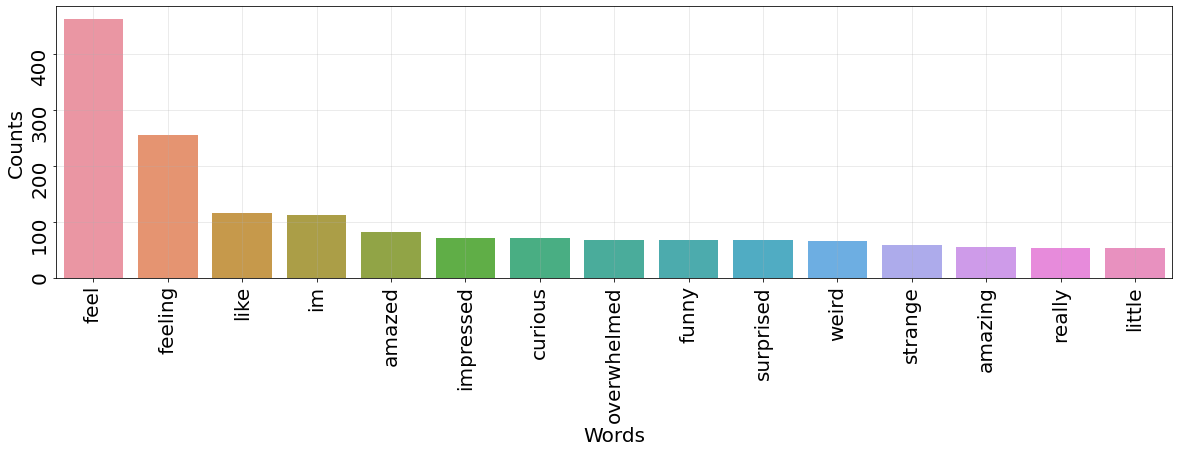

In [18]:
%%time
counter = Counter(corpus)
most    = counter.most_common()
x = []
y = []
for word,count in most[:]:
    if (word not in stop_words) :
        x.append(word)
        y.append(count)
        
plt.figure(figsize=(20,5))
sns.barplot(y=y[:15],x=x[:15])
plt.ylabel(f'Counts',fontsize=20)
plt.xlabel(f'Words',fontsize=20)
plt.tick_params(axis='both',labelsize=20,rotation=90)
plt.grid(alpha=0.3)

## N-gram analysis

Wall time: 3.15 s


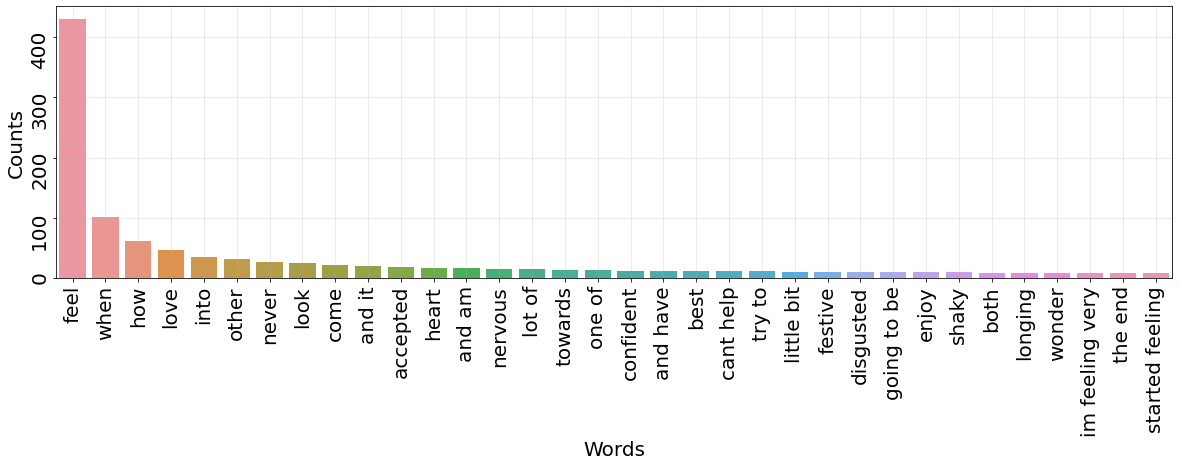

In [19]:
%%time
def get_top_text_trigrams(corpus, n=None):
    vec = TfidfVectorizer(ngram_range=(1,3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top_text_trigrams = get_top_text_trigrams(Data['Text'])[:1000]
x,y=map(list,zip(*top_text_trigrams))

plt.figure(figsize=(20,5))
sns.barplot(y=y[::30],x=x[::30])
plt.ylabel(f'Counts',fontsize=20)
plt.xlabel(f'Words',fontsize=20)
plt.tick_params(axis='both',labelsize=20,rotation=90)
plt.grid(alpha=0.3)

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">3. Text Preprocessing</p>

# Removing null  and duplicated samples 

In [20]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Text         20000 non-null  object
 1   Emotions     20000 non-null  object
 2   Text_Length  20000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 625.0+ KB


In [21]:
print('Sum of null Samples: ',Data.isnull().sum().sum())
print('Sum of Duplicated Samples: ',Data.duplicated().sum())
Data = Data.drop_duplicates()
print('Sum of Duplicated Samples after removal: ',Data.duplicated().sum())

Sum of null Samples:  0
Sum of Duplicated Samples:  1
Sum of Duplicated Samples after removal:  0


# Tokenization

+ Converting Paragraphs into different separate words and sentences

In [22]:
%%time
nltk.download('punkt')
Text_Tokenized = []
for i in range(len(Data['Text'])):
    Text_tok = nltk.sent_tokenize(np.array(Data['Text'])[i])
    Text_Tokenized.append(Text_tok)
Text_Tokeniz = []
for i in range(len(Text_Tokenized)):
    Text_Tokeniz.append(Text_Tokenized[i][0])
    
Data['Text'] = Text_Tokeniz

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ravi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Wall time: 3.14 s


# Removing URLs from the Text 

In [23]:
def Remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

Data['Text'] = Data['Text'].apply(lambda x : Remove_URL(x))

# Removing HTML tags

In [24]:
def Remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

Data['Text'] = Data['Text'].apply(lambda x : Remove_html(x))

# Removing Emojis

In [25]:
def Remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

Data['Text'] = Data['Text'].apply(lambda x : Remove_emoji(x))

# Removing punctuations

In [26]:
def Remove_punct(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)

Data['Text'] = Data['Text'].apply(lambda x : Remove_punct(x))

# Removing Stopwords 

+ import re
  + Library which provides regular expression matching operations to remove stopwords from our text.
  + It will not help to predict our text emotion like all the articles(the, a , an...)
+ import nltk
  + Downloading all the stopwords from the nltk library
    + nltk.download('stopwords')

+ Importing stopwords
  + from nltk.corpus import stopwords

In [27]:
Allstop_words = []
for i in range(len(EM)):
    emotions = EM[i]
    stop_words = stopwords.words('english')
    corpus = create_corpus(f'{emotions}')
    for word in corpus:
        if word in stop_words:
            if word not in Allstop_words:
                Allstop_words.append(word)
                
Allstop_words.remove('not')
len(Allstop_words)

148

+ Remove 'not' from the stopwords as it can alter the emotion of expression

In [28]:
Cleaned_Text = []
for i in range(len(Data)):
    Text1 = np.array(Data['Text'])[i]
    Text1 = Text1.split()                                               # Splitting the text into different words 
    Text2 = [word for word in Text1 if not word in set(Allstop_words)]  # Removing the stopwords from the Text
    Text3 = ' '.join(Text2)                                             # Joining all the words together seperating with space
    Cleaned_Text.append(Text3)                                          # Adding the cleaned text to the empty list
Data['Text'] = Cleaned_Text
Cleaned_Text[0:10]

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone cares awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligrams times recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas years feel petronas performed well made huge profit',
 'feel romantic']

## Stemming:
+ It will convert all the words in their roots.
  + Example: loved as love, helped as help, hopes as hope
+ Reason: 
  - As after cleaning the text when will create the bag of words model we will create sparse matrix with each column will have all the different words all having different emotions. So in order to optimize the dimension of the sparse matrix we need to apply stemming. If we don't apply the stemming then in sparse matrix we would have one column for present tense and other for the past tense that would be same thing so will create redundants and will make sparse matrix more complex with higher dimension. 

## Lemmatization:
+ Not losing the meaning while converting words into its root words

In [29]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
Final_Cleaned_Text = []
for i in range(len(Cleaned_Text)):
    Text1 = Cleaned_Text[i]
    Text1 = Text1.lower()                                   # Transforming all the capital letters into lower case letters
    Text1 = Text1.split()                                   # Splitting the text into different words
    Text2 = [lemmatizer.lemmatize(word) for word in Text1]  # Lemmatizing the words of the Text
    Text3 = ' '.join(Text2)                                 # Joining all the words together seperating with space
    Final_Cleaned_Text.append(Text3)                        # Adding the cleaned text to the empty list

# Stemming
ps = PorterStemmer()
Final_Cleaned_Text2 = []
for i in range(len(Final_Cleaned_Text)):
    Text1 = Final_Cleaned_Text[i]
    Text1 = Text1.lower()                                   # Transforming all the capital letters into lower case letters
    Text1 = Text1.split()                                   # Splitting the text into different words
    Text2 = [ps.stem(word) for word in Text1]               # Stemming the words of the Text
    Text3 = ' '.join(Text2)                                 # Joining all the words together seperating with space
    Final_Cleaned_Text2.append(Text3)                       # Adding the cleaned text to the empty list
Data['Text'] = Final_Cleaned_Text2

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ravi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Word Cloud

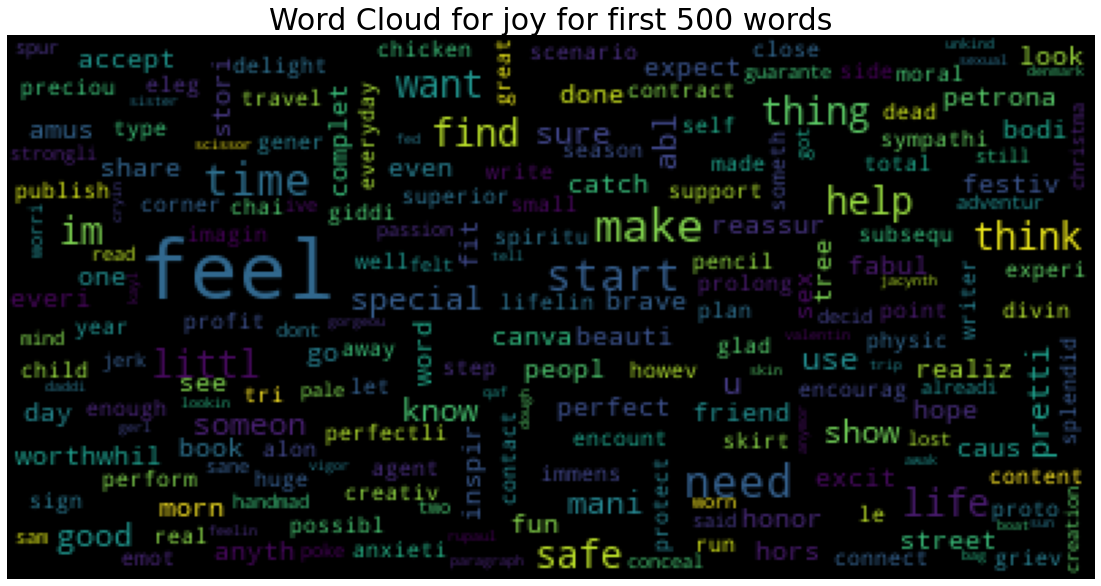

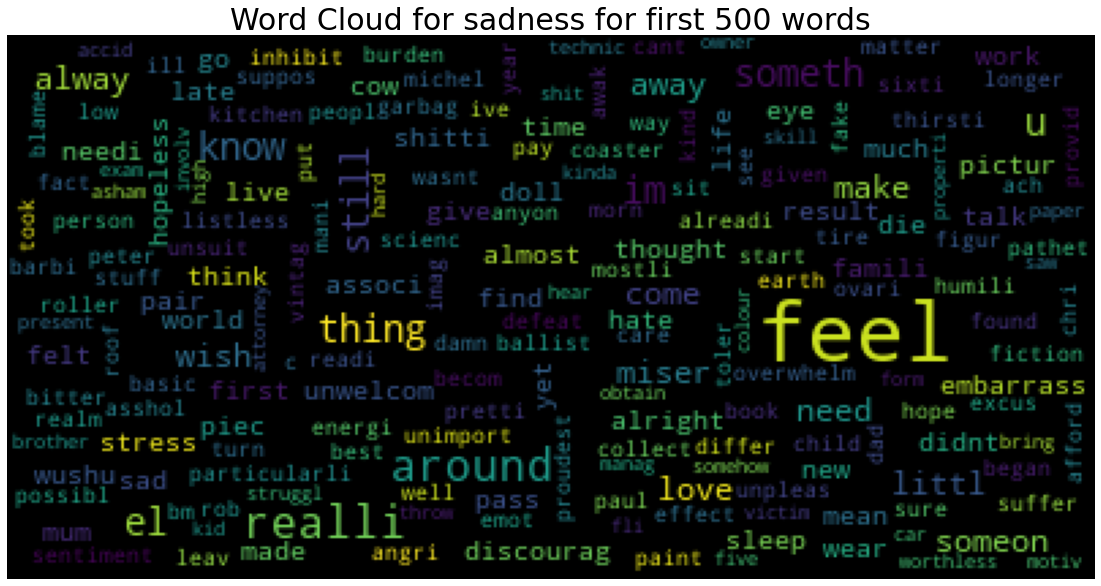

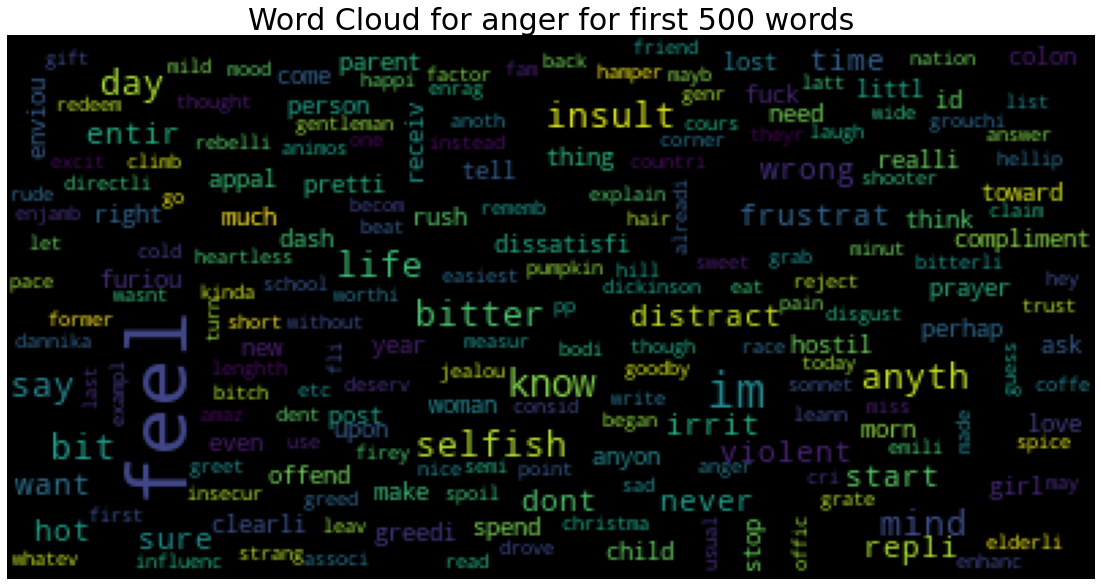

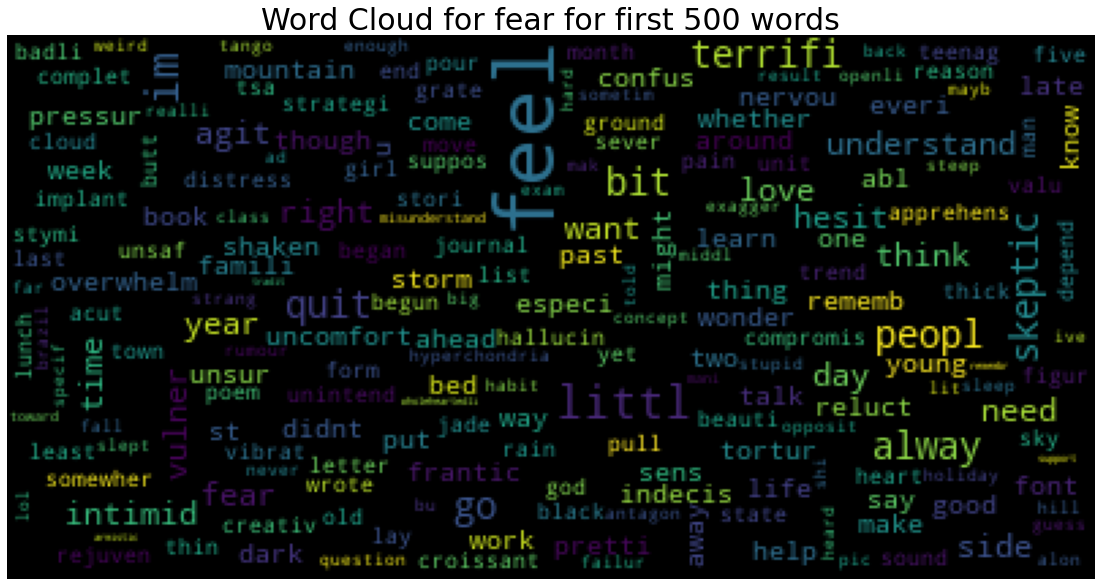

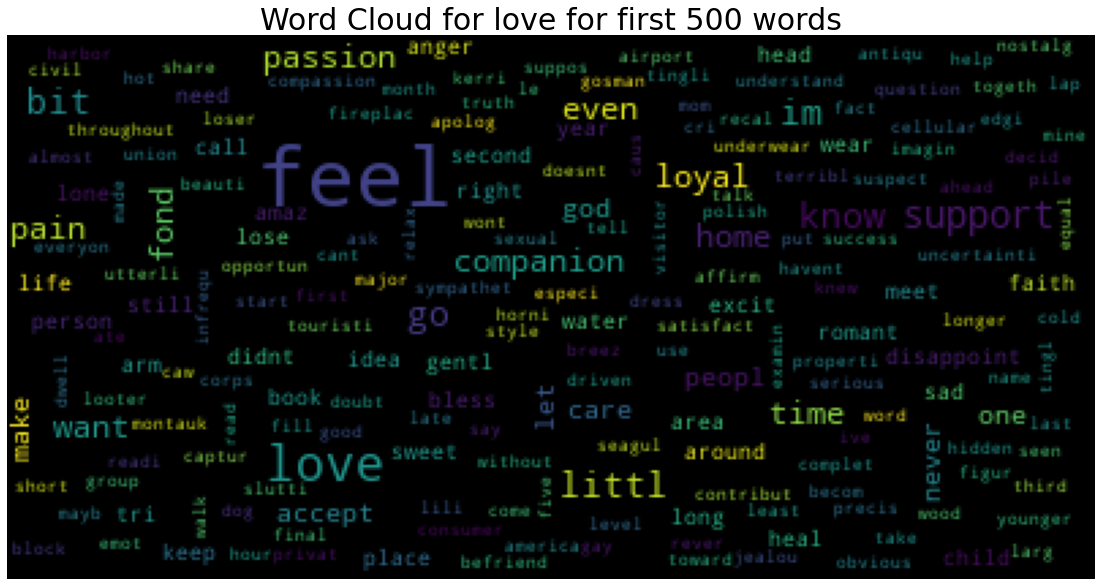

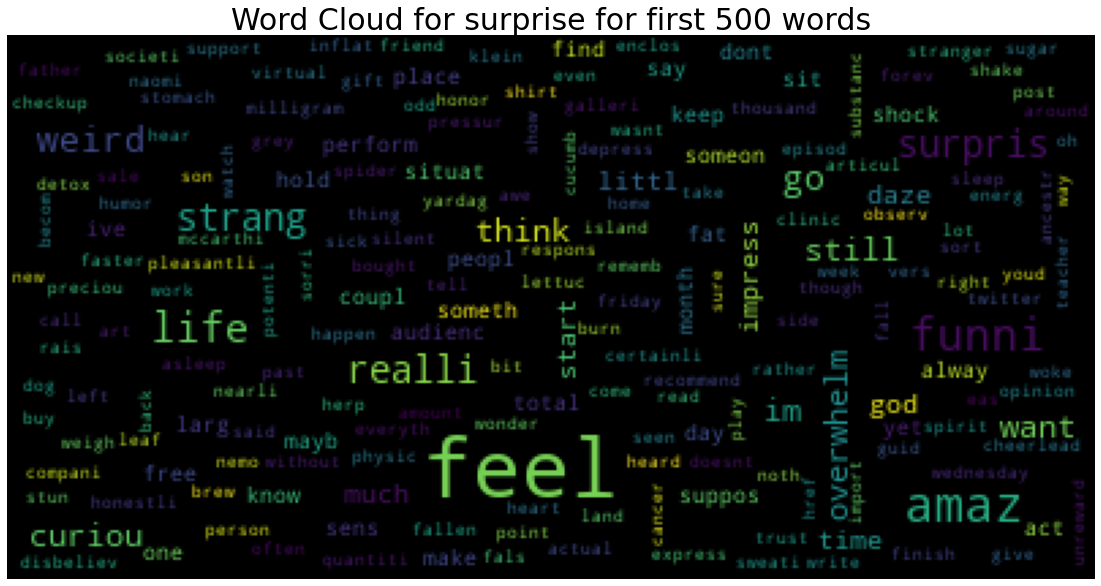

In [30]:
def create_corpus_df(Texts, emotion):
    corpus=[]
    for x in Texts[Texts['Emotions']==emotion]['Text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

for i in range(len(EM)):
    emotions = EM[i]
    corpus_new1 = create_corpus_df(Data,f'{emotions}')
    plt.figure(figsize=(20,10))
    word_cloud = WordCloud(background_color='black',
                           max_font_size = 30
                          ).generate(" ".join(corpus_new1[:500]))
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.title(f'Word Cloud for {emotions} for first 500 words',fontsize=30)
    plt.show()

## Creating the Bag of Words

### Generating features 

In [31]:
cv = TfidfVectorizer(ngram_range=(1,3),binary = True, max_features = 2000)
X  = cv.fit_transform(Cleaned_Text).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Creating dictionary of unique words

In [32]:
Dict = cv.vocabulary_
Dict = sorted(Dict,key=Dict.get)
Dict[0:10]

['ability',
 'able',
 'absolutely',
 'abused',
 'accept',
 'acceptable',
 'accepted',
 'accomplished',
 'ache',
 'aching']

### Target Encoding

In [33]:
y  = Data.iloc[:, 1].values
le = LabelEncoder()
y  = pd.DataFrame(le.fit_transform(y))

### Splitting the datasets into training sets and the test sets

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.3,random_state=0)
print('Training size: ',X_train.shape)
print('Testing size: ',X_test.shape)

Training size:  (13999, 2000)
Testing size:  (6000, 2000)


<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">5. Light Gradient Boosting Model</p>

In [35]:
def Confusion_Matrix(C_M):
    sns.heatmap(C_M, cmap='coolwarm',fmt=".1f",annot=True,annot_kws={'size': 25})
    plt.ylabel('Actual Labels',fontsize=30)
    plt.xlabel('Predicted Labels',fontsize=30) 
    plt.title('Confusion Matrix',fontsize=30)
    plt.tick_params(axis='both', labelsize=25)
    
def Evaluation_of_classifier(y_test, y_predicted):
    print('Accuracy :',100*np.round(accuracy_score(y_test, y_predicted),2),'%')
    print('Error Rate :',100-100*np.round(accuracy_score(y_test, y_predicted),2),'%')
    print('Recall or Sensitivity :',100*recall_score(y_test, y_predicted, average = 'weighted'),'%')
    print('Precision :',100*precision_score(y_test, y_predicted, average = 'weighted'),'%')
    print('F1 Score :',100*f1_score(y_test, y_predicted, average = 'weighted'),'%')

# Light GBM with Default Parameters

In [36]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train,eval_set=(X_test, y_test))
y_predicted = clf.predict(X_test)
accuracy_score(y_test, y_predicted)

[1]	valid_0's multi_logloss: 1.341
[2]	valid_0's multi_logloss: 1.22143
[3]	valid_0's multi_logloss: 1.13015
[4]	valid_0's multi_logloss: 1.05591
[5]	valid_0's multi_logloss: 0.995063
[6]	valid_0's multi_logloss: 0.940985
[7]	valid_0's multi_logloss: 0.893876
[8]	valid_0's multi_logloss: 0.85399
[9]	valid_0's multi_logloss: 0.817969
[10]	valid_0's multi_logloss: 0.785471
[11]	valid_0's multi_logloss: 0.756457
[12]	valid_0's multi_logloss: 0.729894
[13]	valid_0's multi_logloss: 0.705405
[14]	valid_0's multi_logloss: 0.683697
[15]	valid_0's multi_logloss: 0.664229
[16]	valid_0's multi_logloss: 0.646049
[17]	valid_0's multi_logloss: 0.629478
[18]	valid_0's multi_logloss: 0.613956
[19]	valid_0's multi_logloss: 0.600135
[20]	valid_0's multi_logloss: 0.58619
[21]	valid_0's multi_logloss: 0.575593
[22]	valid_0's multi_logloss: 0.563821
[23]	valid_0's multi_logloss: 0.554341
[24]	valid_0's multi_logloss: 0.544651
[25]	valid_0's multi_logloss: 0.535315
[26]	valid_0's multi_logloss: 0.526573
[27

0.8696666666666667

In [37]:
clf.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [38]:
Evaluation_of_classifier(y_test, y_predicted)

Accuracy : 87.0 %
Error Rate : 13.0 %
Recall or Sensitivity : 86.96666666666667 %
Precision : 87.1482979591557 %
F1 Score : 86.93077755085112 %


### Findings:
+ Here we can see that LGBM perfomed well with more than 87 % precision even with the default parameters

# Hyper Parameter Tuning Using GridSearchCv
+ **estimator:** In this we have to pass the models or functions on which we want to use GridSearchCV
+ **param_grid:** Dictionary or list of parameters of models or function in which GridSearchCV have to select the best.
+ **Scoring:** It is used as a evaluating metric for the model performance to decide the best hyperparameters, if not especified then it uses estimator score.
+ **cv:** In this we have to pass a interger value, as it signifies the number of splits that is needed for cross validation. By default is set as five.
+ **n_jobs:** This signifies the number of jobs to be run in parallel, -1 signifies to use all processor.

In [39]:
%%time
parameters = {'n_estimators'  : [200],'learning_rate' : [0.04]}
Grid_CBC   = GridSearchCV(estimator=lgb.LGBMClassifier(), param_grid = parameters, cv = 5, n_jobs=-1)
Grid_CBC.fit(X_train, y_train,eval_set=(X_test, y_test))

[1]	valid_0's multi_logloss: 1.47695
[2]	valid_0's multi_logloss: 1.40599
[3]	valid_0's multi_logloss: 1.34786
[4]	valid_0's multi_logloss: 1.29706
[5]	valid_0's multi_logloss: 1.25207
[6]	valid_0's multi_logloss: 1.21201
[7]	valid_0's multi_logloss: 1.17569
[8]	valid_0's multi_logloss: 1.14218
[9]	valid_0's multi_logloss: 1.11101
[10]	valid_0's multi_logloss: 1.08207
[11]	valid_0's multi_logloss: 1.05535
[12]	valid_0's multi_logloss: 1.02958
[13]	valid_0's multi_logloss: 1.00639
[14]	valid_0's multi_logloss: 0.983886
[15]	valid_0's multi_logloss: 0.963021
[16]	valid_0's multi_logloss: 0.942393
[17]	valid_0's multi_logloss: 0.923784
[18]	valid_0's multi_logloss: 0.905824
[19]	valid_0's multi_logloss: 0.888847
[20]	valid_0's multi_logloss: 0.872494
[21]	valid_0's multi_logloss: 0.857219
[22]	valid_0's multi_logloss: 0.842148
[23]	valid_0's multi_logloss: 0.827955
[24]	valid_0's multi_logloss: 0.814329
[25]	valid_0's multi_logloss: 0.801518
[26]	valid_0's multi_logloss: 0.788599
[27]	val

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.04], 'n_estimators': [200]})

In [40]:
print("The best score across ALL searched params: ",Grid_CBC.best_score_)
print("The best parameters across ALL searched params: ",Grid_CBC.best_params_)

The best score across ALL searched params:  0.8562754555198285
The best parameters across ALL searched params:  {'learning_rate': 0.04, 'n_estimators': 200}


Accuracy : 87.0 %
Error Rate : 13.0 %
Recall or Sensitivity : 86.9 %
Precision : 87.12196007967272 %
F1 Score : 86.87103696023412 %

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       809
           1       0.85      0.85      0.85       722
           2       0.84      0.92      0.88      2023
           3       0.78      0.80      0.79       480
           4       0.94      0.89      0.92      1746
           5       0.81      0.68      0.74       220

    accuracy                           0.87      6000
   macro avg       0.85      0.82      0.84      6000
weighted avg       0.87      0.87      0.87      6000



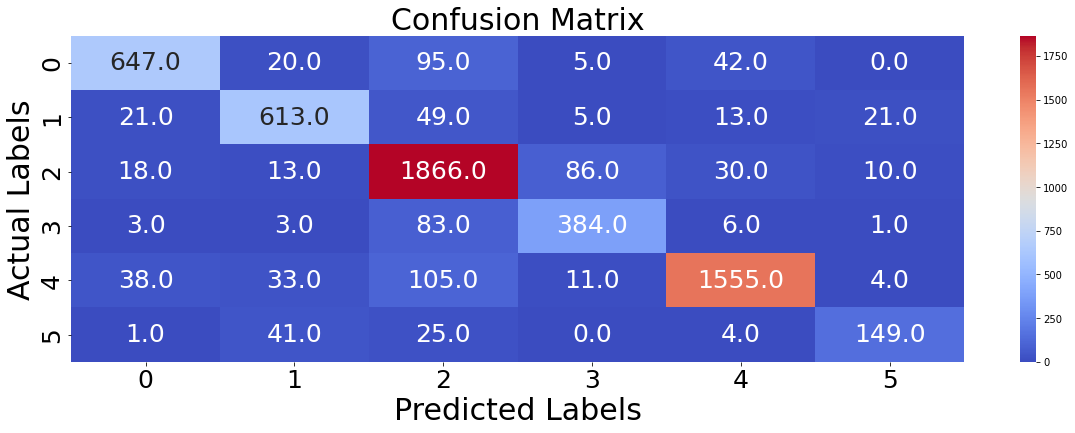

In [41]:
y_predicted = Grid_CBC.predict(X_test)
Evaluation_of_classifier(y_test, y_predicted)
print('\nClassification Report:\n',classification_report(y_test,y_predicted))

C_M = confusion_matrix(y_test, y_predicted) 
Confusion_Matrix(C_M)

# Manual Hyper Parameter Tuning

### 1. Tuning Learning Rate

In [42]:
L = np.arange(0.03,0.06,0.01)
Train_acc_100 = []
Test_acc_100  = []
for L1 in L:
    clf = lgb.LGBMClassifier(n_estimators=100,learning_rate=L1,tree_depth=15)
    clf.fit(X_train, y_train,eval_set=(X_test, y_test))
    y_predicted1 = clf.predict(X_train)
    y_predicted2 = clf.predict(X_test)
    Train_acc_100.append(accuracy_score(y_train, y_predicted1))
    Test_acc_100.append(accuracy_score(y_test, y_predicted2))
    
Train_acc_200 = []
Test_acc_200  = []
for L1 in L:
    clf = lgb.LGBMClassifier(n_estimators=200,learning_rate=L1,tree_depth=15)
    clf.fit(X_train, y_train,eval_set=(X_test, y_test))
    y_predicted1 = clf.predict(X_train)
    y_predicted2 = clf.predict(X_test)
    Train_acc_200.append(accuracy_score(y_train, y_predicted1))
    Test_acc_200.append(accuracy_score(y_test, y_predicted2))

[LightGBM] [Warning] Unknown parameter: tree_depth
[1]	valid_0's multi_logloss: 1.50085
[2]	valid_0's multi_logloss: 1.44314
[3]	valid_0's multi_logloss: 1.39412
[4]	valid_0's multi_logloss: 1.35148
[5]	valid_0's multi_logloss: 1.31295
[6]	valid_0's multi_logloss: 1.27796
[7]	valid_0's multi_logloss: 1.24602
[8]	valid_0's multi_logloss: 1.21591
[9]	valid_0's multi_logloss: 1.18846
[10]	valid_0's multi_logloss: 1.16223
[11]	valid_0's multi_logloss: 1.1377
[12]	valid_0's multi_logloss: 1.11432
[13]	valid_0's multi_logloss: 1.09272
[14]	valid_0's multi_logloss: 1.07209
[15]	valid_0's multi_logloss: 1.05226
[16]	valid_0's multi_logloss: 1.03296
[17]	valid_0's multi_logloss: 1.01513
[18]	valid_0's multi_logloss: 0.998217
[19]	valid_0's multi_logloss: 0.981397
[20]	valid_0's multi_logloss: 0.965649
[21]	valid_0's multi_logloss: 0.950879
[22]	valid_0's multi_logloss: 0.936294
[23]	valid_0's multi_logloss: 0.92252
[24]	valid_0's multi_logloss: 0.908988
[25]	valid_0's multi_logloss: 0.896358
[2

[10]	valid_0's multi_logloss: 1.01466
[11]	valid_0's multi_logloss: 0.985649
[12]	valid_0's multi_logloss: 0.959461
[13]	valid_0's multi_logloss: 0.934399
[14]	valid_0's multi_logloss: 0.911115
[15]	valid_0's multi_logloss: 0.889919
[16]	valid_0's multi_logloss: 0.869702
[17]	valid_0's multi_logloss: 0.849359
[18]	valid_0's multi_logloss: 0.831699
[19]	valid_0's multi_logloss: 0.815005
[20]	valid_0's multi_logloss: 0.798344
[21]	valid_0's multi_logloss: 0.783164
[22]	valid_0's multi_logloss: 0.768326
[23]	valid_0's multi_logloss: 0.754204
[24]	valid_0's multi_logloss: 0.741379
[25]	valid_0's multi_logloss: 0.728347
[26]	valid_0's multi_logloss: 0.716177
[27]	valid_0's multi_logloss: 0.704721
[28]	valid_0's multi_logloss: 0.694016
[29]	valid_0's multi_logloss: 0.683802
[30]	valid_0's multi_logloss: 0.673574
[31]	valid_0's multi_logloss: 0.66385
[32]	valid_0's multi_logloss: 0.654232
[33]	valid_0's multi_logloss: 0.64577
[34]	valid_0's multi_logloss: 0.63718
[35]	valid_0's multi_logloss:

[124]	valid_0's multi_logloss: 0.46642
[125]	valid_0's multi_logloss: 0.465008
[126]	valid_0's multi_logloss: 0.463681
[127]	valid_0's multi_logloss: 0.462223
[128]	valid_0's multi_logloss: 0.460824
[129]	valid_0's multi_logloss: 0.459641
[130]	valid_0's multi_logloss: 0.45851
[131]	valid_0's multi_logloss: 0.457141
[132]	valid_0's multi_logloss: 0.45605
[133]	valid_0's multi_logloss: 0.454859
[134]	valid_0's multi_logloss: 0.453787
[135]	valid_0's multi_logloss: 0.452509
[136]	valid_0's multi_logloss: 0.451337
[137]	valid_0's multi_logloss: 0.450189
[138]	valid_0's multi_logloss: 0.448955
[139]	valid_0's multi_logloss: 0.44777
[140]	valid_0's multi_logloss: 0.446691
[141]	valid_0's multi_logloss: 0.445704
[142]	valid_0's multi_logloss: 0.44462
[143]	valid_0's multi_logloss: 0.443463
[144]	valid_0's multi_logloss: 0.442498
[145]	valid_0's multi_logloss: 0.441366
[146]	valid_0's multi_logloss: 0.440275
[147]	valid_0's multi_logloss: 0.439359
[148]	valid_0's multi_logloss: 0.43821
[149]	

[133]	valid_0's multi_logloss: 0.41232
[134]	valid_0's multi_logloss: 0.41121
[135]	valid_0's multi_logloss: 0.410403
[136]	valid_0's multi_logloss: 0.409481
[137]	valid_0's multi_logloss: 0.408463
[138]	valid_0's multi_logloss: 0.407577
[139]	valid_0's multi_logloss: 0.406728
[140]	valid_0's multi_logloss: 0.405991
[141]	valid_0's multi_logloss: 0.405097
[142]	valid_0's multi_logloss: 0.404333
[143]	valid_0's multi_logloss: 0.403365
[144]	valid_0's multi_logloss: 0.402599
[145]	valid_0's multi_logloss: 0.401566
[146]	valid_0's multi_logloss: 0.400835
[147]	valid_0's multi_logloss: 0.399795
[148]	valid_0's multi_logloss: 0.399007
[149]	valid_0's multi_logloss: 0.398302
[150]	valid_0's multi_logloss: 0.397547
[151]	valid_0's multi_logloss: 0.396799
[152]	valid_0's multi_logloss: 0.39601
[153]	valid_0's multi_logloss: 0.395296
[154]	valid_0's multi_logloss: 0.394503
[155]	valid_0's multi_logloss: 0.393664
[156]	valid_0's multi_logloss: 0.392979
[157]	valid_0's multi_logloss: 0.392461
[15

[142]	valid_0's multi_logloss: 0.381143
[143]	valid_0's multi_logloss: 0.380292
[144]	valid_0's multi_logloss: 0.379775
[145]	valid_0's multi_logloss: 0.379185
[146]	valid_0's multi_logloss: 0.378602
[147]	valid_0's multi_logloss: 0.377954
[148]	valid_0's multi_logloss: 0.377438
[149]	valid_0's multi_logloss: 0.376966
[150]	valid_0's multi_logloss: 0.376571
[151]	valid_0's multi_logloss: 0.376016
[152]	valid_0's multi_logloss: 0.375561
[153]	valid_0's multi_logloss: 0.375044
[154]	valid_0's multi_logloss: 0.374435
[155]	valid_0's multi_logloss: 0.373908
[156]	valid_0's multi_logloss: 0.373466
[157]	valid_0's multi_logloss: 0.373015
[158]	valid_0's multi_logloss: 0.372632
[159]	valid_0's multi_logloss: 0.372069
[160]	valid_0's multi_logloss: 0.371648
[161]	valid_0's multi_logloss: 0.371182
[162]	valid_0's multi_logloss: 0.370799
[163]	valid_0's multi_logloss: 0.370413
[164]	valid_0's multi_logloss: 0.369886
[165]	valid_0's multi_logloss: 0.369355
[166]	valid_0's multi_logloss: 0.368916


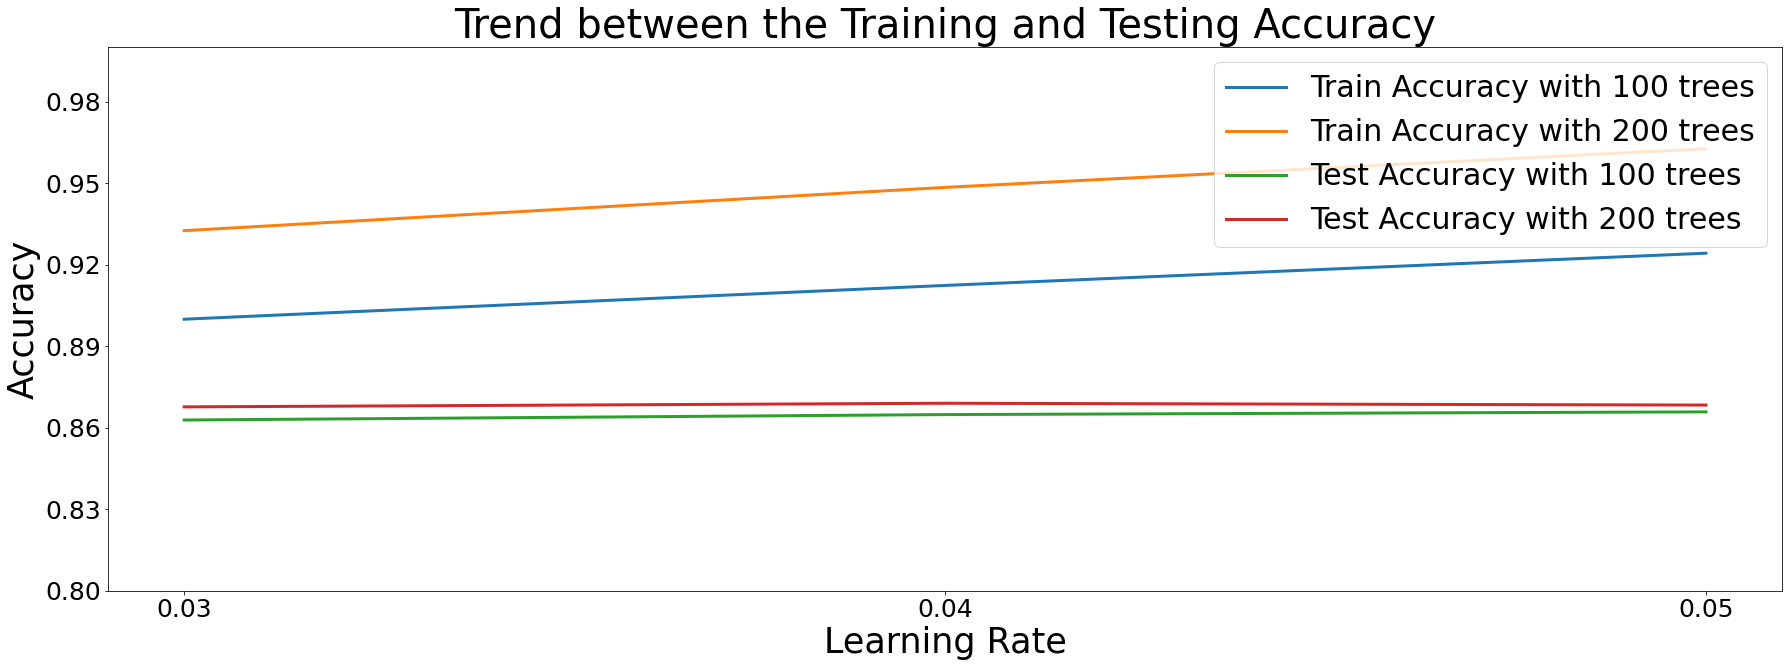

In [43]:
plt.figure(figsize=(30,10))
plt.plot(L,Train_acc_100,linewidth=3,label='Train Accuracy with 100 trees')
plt.plot(L,Train_acc_200,linewidth=3,label='Train Accuracy with 200 trees')
plt.plot(L,Test_acc_100,linewidth=3,label='Test Accuracy with 100 trees')
plt.plot(L,Test_acc_200,linewidth=3,label='Test Accuracy with 200 trees')
plt.title('Trend between the Training and Testing Accuracy',size=40)  
plt.xlabel('Learning Rate',size=35)
plt.ylabel('Accuracy',size=35)
plt.ylim(0.8,1)
plt.xticks(L,size=25)
plt.yticks(np.arange(0.8, 1, 0.03),size=25)
plt.legend(fontsize=30)

## 2. Tuning n_estimators

In [44]:
N = [100,200,300]
Train_acc = []
Test_acc  = []
for N1 in N:
    clf = lgb.LGBMClassifier(n_estimators=N1,learning_rate=0.04,max_depth=20)
    clf.fit(X_train, y_train,eval_set=(X_test, y_test))
    y_predicted1 = clf.predict(X_train)
    y_predicted2 = clf.predict(X_test)
    Train_acc.append(accuracy_score(y_train, y_predicted1))
    Test_acc.append(accuracy_score(y_test, y_predicted2))

[1]	valid_0's multi_logloss: 1.49664
[2]	valid_0's multi_logloss: 1.44155
[3]	valid_0's multi_logloss: 1.39626
[4]	valid_0's multi_logloss: 1.35584
[5]	valid_0's multi_logloss: 1.32075
[6]	valid_0's multi_logloss: 1.28908
[7]	valid_0's multi_logloss: 1.25898
[8]	valid_0's multi_logloss: 1.23109
[9]	valid_0's multi_logloss: 1.20441
[10]	valid_0's multi_logloss: 1.18096
[11]	valid_0's multi_logloss: 1.15821
[12]	valid_0's multi_logloss: 1.13652
[13]	valid_0's multi_logloss: 1.11621
[14]	valid_0's multi_logloss: 1.097
[15]	valid_0's multi_logloss: 1.07857
[16]	valid_0's multi_logloss: 1.06102
[17]	valid_0's multi_logloss: 1.04343
[18]	valid_0's multi_logloss: 1.02753
[19]	valid_0's multi_logloss: 1.01217
[20]	valid_0's multi_logloss: 0.997373
[21]	valid_0's multi_logloss: 0.983179
[22]	valid_0's multi_logloss: 0.969558
[23]	valid_0's multi_logloss: 0.955972
[24]	valid_0's multi_logloss: 0.94327
[25]	valid_0's multi_logloss: 0.931332
[26]	valid_0's multi_logloss: 0.919669
[27]	valid_0's mu

[118]	valid_0's multi_logloss: 0.50448
[119]	valid_0's multi_logloss: 0.502769
[120]	valid_0's multi_logloss: 0.501329
[121]	valid_0's multi_logloss: 0.499643
[122]	valid_0's multi_logloss: 0.498189
[123]	valid_0's multi_logloss: 0.496651
[124]	valid_0's multi_logloss: 0.49517
[125]	valid_0's multi_logloss: 0.49351
[126]	valid_0's multi_logloss: 0.492102
[127]	valid_0's multi_logloss: 0.490691
[128]	valid_0's multi_logloss: 0.489213
[129]	valid_0's multi_logloss: 0.487768
[130]	valid_0's multi_logloss: 0.48643
[131]	valid_0's multi_logloss: 0.48508
[132]	valid_0's multi_logloss: 0.483745
[133]	valid_0's multi_logloss: 0.482323
[134]	valid_0's multi_logloss: 0.48104
[135]	valid_0's multi_logloss: 0.479628
[136]	valid_0's multi_logloss: 0.478248
[137]	valid_0's multi_logloss: 0.476841
[138]	valid_0's multi_logloss: 0.475625
[139]	valid_0's multi_logloss: 0.47443
[140]	valid_0's multi_logloss: 0.473124
[141]	valid_0's multi_logloss: 0.471834
[142]	valid_0's multi_logloss: 0.470498
[143]	v

[128]	valid_0's multi_logloss: 0.489213
[129]	valid_0's multi_logloss: 0.487768
[130]	valid_0's multi_logloss: 0.48643
[131]	valid_0's multi_logloss: 0.48508
[132]	valid_0's multi_logloss: 0.483745
[133]	valid_0's multi_logloss: 0.482323
[134]	valid_0's multi_logloss: 0.48104
[135]	valid_0's multi_logloss: 0.479628
[136]	valid_0's multi_logloss: 0.478248
[137]	valid_0's multi_logloss: 0.476841
[138]	valid_0's multi_logloss: 0.475625
[139]	valid_0's multi_logloss: 0.47443
[140]	valid_0's multi_logloss: 0.473124
[141]	valid_0's multi_logloss: 0.471834
[142]	valid_0's multi_logloss: 0.470498
[143]	valid_0's multi_logloss: 0.469368
[144]	valid_0's multi_logloss: 0.468181
[145]	valid_0's multi_logloss: 0.46704
[146]	valid_0's multi_logloss: 0.465808
[147]	valid_0's multi_logloss: 0.464789
[148]	valid_0's multi_logloss: 0.463637
[149]	valid_0's multi_logloss: 0.462558
[150]	valid_0's multi_logloss: 0.461408
[151]	valid_0's multi_logloss: 0.460323
[152]	valid_0's multi_logloss: 0.459217
[153]

Wall time: 55.4 ms


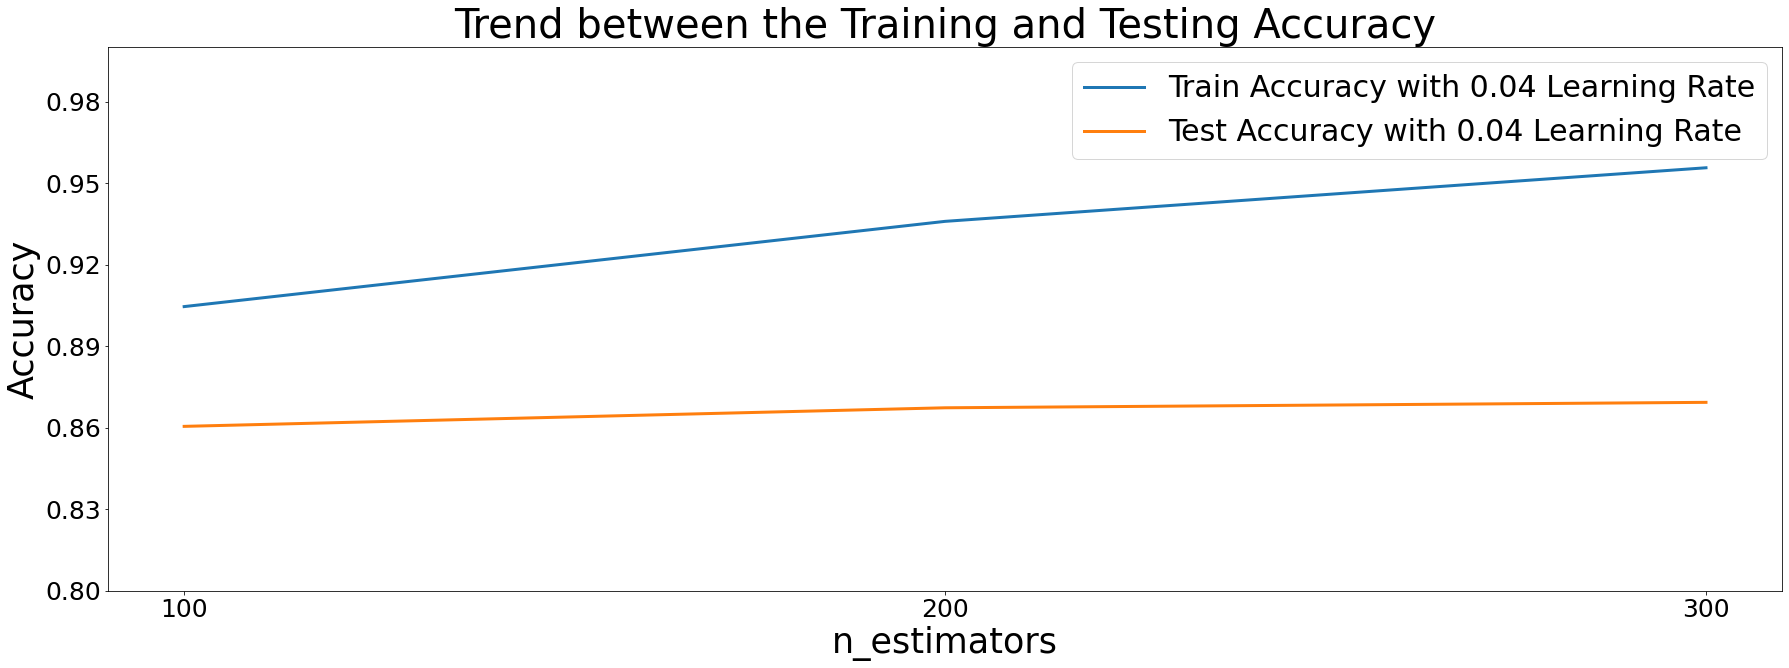

In [45]:
%%time
plt.figure(figsize=(30,10))
plt.plot(N,Train_acc,linewidth=3,label='Train Accuracy with 0.04 Learning Rate')
plt.plot(N,Test_acc,linewidth=3,label='Test Accuracy with 0.04 Learning Rate')
plt.title('Trend between the Training and Testing Accuracy',size=40)  
plt.xlabel('n_estimators',size=35)
plt.ylabel('Accuracy',size=35)
plt.ylim(0.8,1)
plt.xticks(N,size=25)
plt.yticks(np.arange(0.8, 1, 0.03),size=25)
plt.legend(fontsize=30)

[1]	valid_0's multi_logloss: 1.49664
[2]	valid_0's multi_logloss: 1.44155
[3]	valid_0's multi_logloss: 1.39626
[4]	valid_0's multi_logloss: 1.35584
[5]	valid_0's multi_logloss: 1.32075
[6]	valid_0's multi_logloss: 1.28908
[7]	valid_0's multi_logloss: 1.25898
[8]	valid_0's multi_logloss: 1.23109
[9]	valid_0's multi_logloss: 1.20441
[10]	valid_0's multi_logloss: 1.18096
[11]	valid_0's multi_logloss: 1.15821
[12]	valid_0's multi_logloss: 1.13652
[13]	valid_0's multi_logloss: 1.11621
[14]	valid_0's multi_logloss: 1.097
[15]	valid_0's multi_logloss: 1.07857
[16]	valid_0's multi_logloss: 1.06102
[17]	valid_0's multi_logloss: 1.04343
[18]	valid_0's multi_logloss: 1.02753
[19]	valid_0's multi_logloss: 1.01217
[20]	valid_0's multi_logloss: 0.997373
[21]	valid_0's multi_logloss: 0.983179
[22]	valid_0's multi_logloss: 0.969558
[23]	valid_0's multi_logloss: 0.955972
[24]	valid_0's multi_logloss: 0.94327
[25]	valid_0's multi_logloss: 0.931332
[26]	valid_0's multi_logloss: 0.919669
[27]	valid_0's mu

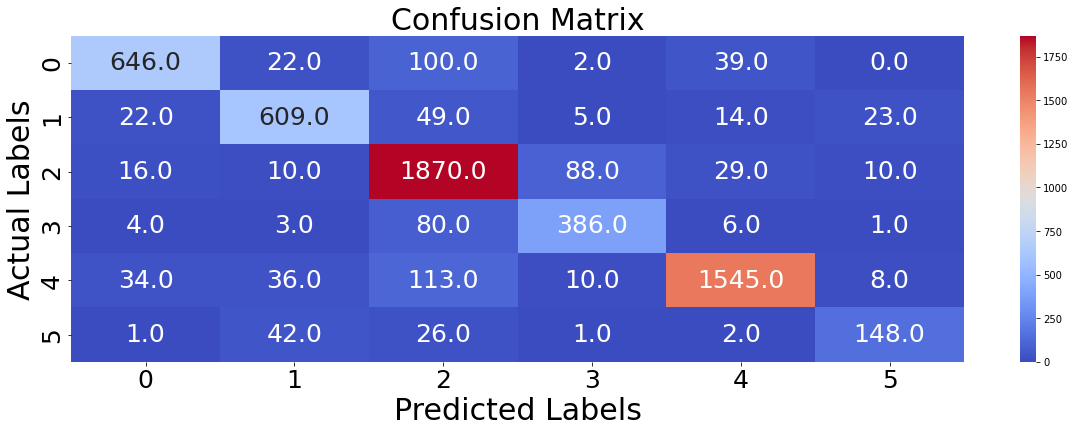

In [46]:
clf = lgb.LGBMClassifier(n_estimators=200,learning_rate=0.04,max_depth=20)
clf.fit(X_train, y_train,eval_set=(X_test, y_test))
y_predicted = clf.predict(X_test)

y_predicted = clf.predict(X_test)
Evaluation_of_classifier(y_test, y_predicted)
print('\nClassification Report:\n',classification_report(y_test,y_predicted))

C_M = confusion_matrix(y_test, y_predicted) 
Confusion_Matrix(C_M)

<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> 6. CatBoost Classifier </p>

+ CatBoost is a high-performance open source library for gradient boosting on decision trees.
  + So, CatBoost is an algorithm for gradient boosting on decision trees. 
  + It is a readymade classifier in scikit-learn’s conventions terms that would deal with categorical features automatically.
  + It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. 
  + It can work with diverse data types to help solve a wide range of problems that businesses face today. 
  + It is developed by Yandex researchers and engineers, and is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks.
  + Also, it provides best-in-class accuracy.


+ CatBoost is powerful in two ways:
  - It yields state-of-the-art results without extensive data training 
  - Provides powerful out-of-the-box support for the more descriptive data formats that accompany many business problems.


+ **CatBoost** name comes from two words - **Category** and **Boosting**.
+ It can also return very good results with relatively less data, unlike DL models that need to learn from a massive amount of data.

In [47]:
%%time
clf = CatBoostClassifier(iterations=500,custom_loss=['Accuracy'])
clf.fit(X_train, y_train,eval_set=(X_test, y_test))

Learning rate set to 0.148335
0:	learn: 1.7298675	test: 1.7305170	best: 1.7305170 (0)	total: 433ms	remaining: 3m 36s
1:	learn: 1.6834591	test: 1.6841344	best: 1.6841344 (1)	total: 721ms	remaining: 2m 59s
2:	learn: 1.6514386	test: 1.6522887	best: 1.6522887 (2)	total: 997ms	remaining: 2m 45s
3:	learn: 1.6203236	test: 1.6225807	best: 1.6225807 (3)	total: 1.27s	remaining: 2m 37s
4:	learn: 1.5955546	test: 1.5983899	best: 1.5983899 (4)	total: 1.56s	remaining: 2m 34s
5:	learn: 1.5726661	test: 1.5752314	best: 1.5752314 (5)	total: 1.83s	remaining: 2m 31s
6:	learn: 1.5572641	test: 1.5607232	best: 1.5607232 (6)	total: 2.1s	remaining: 2m 28s
7:	learn: 1.5413980	test: 1.5461920	best: 1.5461920 (7)	total: 2.38s	remaining: 2m 26s
8:	learn: 1.5247186	test: 1.5303193	best: 1.5303193 (8)	total: 2.66s	remaining: 2m 24s
9:	learn: 1.5092098	test: 1.5155539	best: 1.5155539 (9)	total: 2.93s	remaining: 2m 23s
10:	learn: 1.4959367	test: 1.5024877	best: 1.5024877 (10)	total: 3.2s	remaining: 2m 22s
11:	learn: 1.

93:	learn: 1.0466546	test: 1.0773314	best: 1.0773314 (93)	total: 28.5s	remaining: 2m 3s
94:	learn: 1.0432916	test: 1.0739697	best: 1.0739697 (94)	total: 28.8s	remaining: 2m 2s
95:	learn: 1.0399101	test: 1.0709436	best: 1.0709436 (95)	total: 29.2s	remaining: 2m 2s
96:	learn: 1.0366376	test: 1.0680566	best: 1.0680566 (96)	total: 29.5s	remaining: 2m 2s
97:	learn: 1.0332300	test: 1.0645538	best: 1.0645538 (97)	total: 29.8s	remaining: 2m 2s
98:	learn: 1.0291028	test: 1.0613783	best: 1.0613783 (98)	total: 30.1s	remaining: 2m 1s
99:	learn: 1.0256287	test: 1.0579082	best: 1.0579082 (99)	total: 30.4s	remaining: 2m 1s
100:	learn: 1.0225797	test: 1.0554858	best: 1.0554858 (100)	total: 30.7s	remaining: 2m 1s
101:	learn: 1.0193753	test: 1.0527805	best: 1.0527805 (101)	total: 31.1s	remaining: 2m 1s
102:	learn: 1.0156075	test: 1.0485711	best: 1.0485711 (102)	total: 31.3s	remaining: 2m
103:	learn: 1.0125486	test: 1.0453241	best: 1.0453241 (103)	total: 31.7s	remaining: 2m
104:	learn: 1.0095436	test: 1.

184:	learn: 0.8097946	test: 0.8466251	best: 0.8466251 (184)	total: 57.3s	remaining: 1m 37s
185:	learn: 0.8078497	test: 0.8445386	best: 0.8445386 (185)	total: 57.6s	remaining: 1m 37s
186:	learn: 0.8061938	test: 0.8429518	best: 0.8429518 (186)	total: 57.9s	remaining: 1m 36s
187:	learn: 0.8042617	test: 0.8409149	best: 0.8409149 (187)	total: 58.2s	remaining: 1m 36s
188:	learn: 0.8023614	test: 0.8393048	best: 0.8393048 (188)	total: 58.5s	remaining: 1m 36s
189:	learn: 0.8004634	test: 0.8376352	best: 0.8376352 (189)	total: 58.7s	remaining: 1m 35s
190:	learn: 0.7987287	test: 0.8355524	best: 0.8355524 (190)	total: 59s	remaining: 1m 35s
191:	learn: 0.7969900	test: 0.8336029	best: 0.8336029 (191)	total: 59.3s	remaining: 1m 35s
192:	learn: 0.7951235	test: 0.8318509	best: 0.8318509 (192)	total: 59.7s	remaining: 1m 34s
193:	learn: 0.7933588	test: 0.8300362	best: 0.8300362 (193)	total: 60s	remaining: 1m 34s
194:	learn: 0.7913992	test: 0.8285457	best: 0.8285457 (194)	total: 1m	remaining: 1m 34s
195:	l

274:	learn: 0.6684007	test: 0.7083585	best: 0.7083585 (274)	total: 1m 22s	remaining: 1m 7s
275:	learn: 0.6672013	test: 0.7067838	best: 0.7067838 (275)	total: 1m 23s	remaining: 1m 7s
276:	learn: 0.6660271	test: 0.7055184	best: 0.7055184 (276)	total: 1m 23s	remaining: 1m 7s
277:	learn: 0.6647953	test: 0.7042705	best: 0.7042705 (277)	total: 1m 23s	remaining: 1m 6s
278:	learn: 0.6635669	test: 0.7032669	best: 0.7032669 (278)	total: 1m 23s	remaining: 1m 6s
279:	learn: 0.6624048	test: 0.7021952	best: 0.7021952 (279)	total: 1m 24s	remaining: 1m 6s
280:	learn: 0.6612878	test: 0.7012702	best: 0.7012702 (280)	total: 1m 24s	remaining: 1m 5s
281:	learn: 0.6599047	test: 0.7002533	best: 0.7002533 (281)	total: 1m 24s	remaining: 1m 5s
282:	learn: 0.6585933	test: 0.6988608	best: 0.6988608 (282)	total: 1m 25s	remaining: 1m 5s
283:	learn: 0.6573990	test: 0.6977219	best: 0.6977219 (283)	total: 1m 25s	remaining: 1m 4s
284:	learn: 0.6562564	test: 0.6966075	best: 0.6966075 (284)	total: 1m 25s	remaining: 1m 4s

365:	learn: 0.5746062	test: 0.6166466	best: 0.6166466 (365)	total: 1m 48s	remaining: 39.7s
366:	learn: 0.5735297	test: 0.6157456	best: 0.6157456 (366)	total: 1m 48s	remaining: 39.4s
367:	learn: 0.5727787	test: 0.6146594	best: 0.6146594 (367)	total: 1m 48s	remaining: 39.1s
368:	learn: 0.5718444	test: 0.6136356	best: 0.6136356 (368)	total: 1m 49s	remaining: 38.8s
369:	learn: 0.5709223	test: 0.6127574	best: 0.6127574 (369)	total: 1m 49s	remaining: 38.5s
370:	learn: 0.5700891	test: 0.6120616	best: 0.6120616 (370)	total: 1m 49s	remaining: 38.2s
371:	learn: 0.5691740	test: 0.6113498	best: 0.6113498 (371)	total: 1m 50s	remaining: 37.9s
372:	learn: 0.5683278	test: 0.6104259	best: 0.6104259 (372)	total: 1m 50s	remaining: 37.6s
373:	learn: 0.5673834	test: 0.6094757	best: 0.6094757 (373)	total: 1m 50s	remaining: 37.3s
374:	learn: 0.5666729	test: 0.6087675	best: 0.6087675 (374)	total: 1m 50s	remaining: 37s
375:	learn: 0.5659186	test: 0.6078714	best: 0.6078714 (375)	total: 1m 51s	remaining: 36.7s
3

456:	learn: 0.5091386	test: 0.5532248	best: 0.5532248 (456)	total: 2m 14s	remaining: 12.6s
457:	learn: 0.5086975	test: 0.5527948	best: 0.5527948 (457)	total: 2m 14s	remaining: 12.3s
458:	learn: 0.5080245	test: 0.5521762	best: 0.5521762 (458)	total: 2m 14s	remaining: 12s
459:	learn: 0.5076029	test: 0.5518047	best: 0.5518047 (459)	total: 2m 14s	remaining: 11.7s
460:	learn: 0.5069697	test: 0.5512082	best: 0.5512082 (460)	total: 2m 15s	remaining: 11.4s
461:	learn: 0.5065149	test: 0.5507283	best: 0.5507283 (461)	total: 2m 15s	remaining: 11.1s
462:	learn: 0.5059948	test: 0.5501344	best: 0.5501344 (462)	total: 2m 15s	remaining: 10.8s
463:	learn: 0.5054639	test: 0.5496956	best: 0.5496956 (463)	total: 2m 15s	remaining: 10.6s
464:	learn: 0.5049760	test: 0.5491749	best: 0.5491749 (464)	total: 2m 16s	remaining: 10.3s
465:	learn: 0.5043670	test: 0.5485497	best: 0.5485497 (465)	total: 2m 16s	remaining: 9.96s
466:	learn: 0.5036645	test: 0.5479182	best: 0.5479182 (466)	total: 2m 16s	remaining: 9.67s
4

Accuracy : 87.0 %
Error Rate : 13.0 %
Recall or Sensitivity : 87.33333333333333 %
Precision : 87.4242528728993 %
F1 Score : 87.1352456227595 %

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.87       809
           1       0.86      0.84      0.85       722
           2       0.84      0.94      0.88      2023
           3       0.83      0.69      0.76       480
           4       0.93      0.92      0.92      1746
           5       0.81      0.59      0.68       220

    accuracy                           0.87      6000
   macro avg       0.86      0.80      0.83      6000
weighted avg       0.87      0.87      0.87      6000



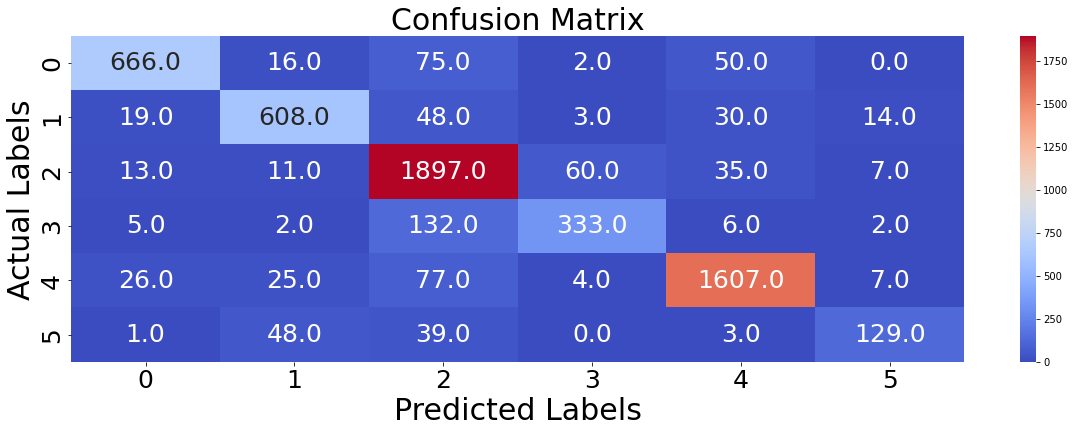

In [48]:
y_predicted = clf.predict(X_test)
Evaluation_of_classifier(y_test, y_predicted)
print('\nClassification Report:\n',classification_report(y_test,y_predicted))

C_M = confusion_matrix(y_test, y_predicted) 
Confusion_Matrix(C_M)

## Advantages:
- **Performance**: CatBoost provides state of the art results and it is competitive with any leading machine learning algorithm on the performance front.
- **Handling Categorical features automatically**: We can use CatBoost without any explicit pre-processing to convert categories into numbers. CatBoost converts categorical values into numbers using various statistics on combinations of categorical features and combinations of categorical and numerical features. 
- **Robust**: It reduces the need for extensive hyper-parameter tuning and lower the chances of overfitting also which leads to more generalized models. Although, CatBoost has multiple parameters to tune and it contains parameters like the number of trees, learning rate, regularization, tree depth, fold size, bagging temperature and others.